In [46]:
# Written using R version 4.0.0
library(readstata13)
library(survey)
library(xlsx)
library(data.table)
library(DescTools)

In [47]:
# Load Data
setwd("/Users/huangzhuoyi/Zoey/Stanford/RA/Surgery/KID project")

In [5]:
#---------------------------------
dat <- read.dta13("data/LT_CoreData_ChildAbuse_2006_2009_2012KID(5.26).dta")
# Looking at only pediatric patients
dat <- dat[dat$AGE < 18 & !is.na(dat$AGE),]

print(colnames(dat))
# cols_to_keep = c("DISCWT", "AGE", "RACE", "YEAR", "ZIPINC_QRTL", "FEMALE", "PAY1", "totcost",
#                  "Child_abuse", "DIED", "LOS", "ATYPE", "RECNUM", "xiss", "niss", "MDC", 
#                  "HOSP_LOCTEACH", "HOSP_BEDSIZE", "HOSP_REGION", "NACHTYPE", "HOSP_CONTROL",
#                  "event_primdx_traumaICD9", "event_anydx_traumaICD9")
cols_to_keep = c("DISCWT", "AGE", "RACE", "YEAR", "ZIPINC_QRTL", "FEMALE", "PAY1", "totcost",
                 "Child_abuse", "DIED", "LOS", "RECNUM", "xiss", "niss", "MDC", 
                 "HOSP_LOCTEACH", "HOSP_BEDSIZE", "HOSP_REGION", "HOSP_CONTROL",
                 "event_primdx_traumaICD9", "event_anydx_traumaICD9")
dat <- dat[, cols_to_keep]
# Adjust using CPI to 2021 prices
dat[dat$YEAR == 2006,]$totcost <- dat[dat$YEAR == 2006,]$totcost * 1.292034
dat[dat$YEAR == 2009,]$totcost <- dat[dat$YEAR == 2009,]$totcost * 1.214122
dat[dat$YEAR == 2012,]$totcost <- dat[dat$YEAR == 2012,]$totcost * 1.134498
save.dta13(dat, "data/LT_CoreData_ChildAbuse_2006_2009_2012KID(5.26)_processed_new.dta")

  [1] "HOSPID"                  "RECNUM"                 
  [3] "AGE"                     "AGEDAY"                 
  [5] "AGEMONTH"                "AMONTH"                 
  [7] "ASOURCE"                 "ASOURCEUB92"            
  [9] "ATYPE"                   "AWEEKEND"               
 [11] "BWT"                     "DIED"                   
 [13] "DISCWT"                  "DISPUB92"               
 [15] "DISPUNIFORM"             "DQTR"                   
 [17] "DRG"                     "DRG24"                  
 [19] "DRGVER"                  "DSHOSPID"               
 [21] "ELECTIVE"                "FEMALE"                 
 [23] "HOSPBRTH"                "HOSPST"                 
 [25] "KID_STRATUM"             "LOS"                    
 [27] "MDC"                     "MDC24"                  
 [29] "MDNUM1_R"                "MDNUM2_R"               
 [31] "NDX"                     "NECODE"                 
 [33] "NEOMAT"                  "NPR"                    
 [35] "PAY1"  

In [6]:
#---------------------------------
ndat <- read.dta13("data/LT-KID_CoreData_2016_2019SR.dta")
# Looking at only pediatric patients
ndat <- ndat[ndat$AGE < 18 & !is.na(ndat$AGE),]

print(colnames(ndat))
cols_to_keep = c("DISCWT", "AGE", "RACE", "YEAR", "ZIPINC_QRTL", "FEMALE", "PAY1", "TOTCHG", "CCR_KID",
                 "Child_neglect_SUS", "Child_neglect_CON", "Child_psychoabuse_SUS", "Child_psychoabuse_CON",
                 "Child_physicalabuse_SUS", "Child_physicalabuse_CON", "encounter_childabuse", 
                 "Child_sexual_abuseSUS", "Child_sexual_abuseCON", "Encounter_rape", "child_maltreatmentCON", 
                 "shaken_infant", "DIED", "LOS", "RECNUM", "RISS", "NISS", "MDC", 
                 "HOSP_LOCTEACH", "HOSP_BEDSIZE", "HOSP_REGION", "H_CONTRL",
                 "event_primary_traumaICD10", "event_anydx_traumaICD10")
ndat <- ndat[, cols_to_keep]
# Adjust using code gen total_COST= CCR_KID*TOTCHG
ndat$totcost <- ndat$TOTCHG * ndat$CCR_KID
ndat[ndat$YEAR == 2016,]$totcost <- ndat[ndat$YEAR == 2016,]$totcost * 1.18
ndat[ndat$YEAR == 2019,]$totcost <- ndat[ndat$YEAR == 2019,]$totcost * 1.11

save.dta13(ndat, "data/LT_CoreData_ChildAbuse_2016_2019SR_processed.dta")

 [1] "HOSP_KID"                  "RECNUM"                   
 [3] "AGE"                       "AGE_NEONATE"              
 [5] "AMONTH"                    "AWEEKEND"                 
 [7] "DIED"                      "DISCWT"                   
 [9] "DISPUNIFORM"               "DQTR"                     
[11] "DRG"                       "DRGVER"                   
[13] "DRG_NoPOA"                 "DXVER"                    
[15] "ELECTIVE"                  "FEMALE"                   
[17] "HCUP_ED"                   "HOSP_REGION"              
[19] "I10_NPR"                   "KID_STRATUM"              
[21] "LOS"                       "MDC"                      
[23] "MDC_NoPOA"                 "PAY1"                     
[25] "PL_NCHS"                   "PRVER"                    
[27] "RACE"                      "TOTCHG"                   
[29] "TRAN_IN"                   "TRAN_OUT"                 
[31] "YEAR"                      "ZIPINC_QRTL"              
[33] "CHF"              

In [48]:
dat <- read.dta13("data/LT_CoreData_ChildAbuse_2006_2009_2012KID(5.26)_processed_new.dta")
ndat <- read.dta13("data/LT_CoreData_ChildAbuse_2016_2019SR_processed.dta")

In [49]:
dat$AGEGROUP <- NA
dat[dat$AGE < 18,]$AGEGROUP <- "12-17"
dat[dat$AGE <= 11, ]$AGEGROUP <- "8-11"
dat[dat$AGE <= 7, ]$AGEGROUP <- "4-7"
dat[dat$AGE <= 3, ]$AGEGROUP <- "1-3"
dat[dat$AGE <  1, ]$AGEGROUP <- "<1"

dat$SEVGROUP <- NA
dat[dat$niss <= 75,]$SEVGROUP <- ">25"
dat[dat$niss <= 24, ]$SEVGROUP <- "16-24"
dat[dat$niss <= 15, ]$SEVGROUP <- "0-15"

In [50]:
ndat$AGEGROUP <- NA
ndat[ndat$AGE < 18,]$AGEGROUP <- "12-17"
ndat[ndat$AGE <= 11, ]$AGEGROUP <- "8-11"
ndat[ndat$AGE <= 7, ]$AGEGROUP <- "4-7"
ndat[ndat$AGE <= 3, ]$AGEGROUP <- "1-3"
ndat[ndat$AGE <  1, ]$AGEGROUP <- "<1"

ndat$SEVGROUP <- NA
ndat[ndat$NISS <= 75,]$SEVGROUP <- ">25"
ndat[ndat$NISS <= 24, ]$SEVGROUP <- "16-24"
ndat[ndat$NISS <= 15, ]$SEVGROUP <- "0-15"

In [51]:
dim(dat) # 7861817 * 27

[1] 7861817      23

In [52]:
dim(ndat) # 5279243 * 27

[1] 5279243      36

In [53]:
names(dat)

[1] "DISCWT"                  "AGE"                    
 [3] "RACE"                    "YEAR"                   
 [5] "ZIPINC_QRTL"             "FEMALE"                 
 [7] "PAY1"                    "totcost"                
 [9] "Child_abuse"             "DIED"                   
[11] "LOS"                     "RECNUM"                 
[13] "xiss"                    "niss"                   
[15] "MDC"                     "HOSP_LOCTEACH"          
[17] "HOSP_BEDSIZE"            "HOSP_REGION"            
[19] "HOSP_CONTROL"            "event_primdx_traumaICD9"
[21] "event_anydx_traumaICD9"  "AGEGROUP"               
[23] "SEVGROUP"

In [54]:
names(ndat)

[1] "DISCWT"                    "AGE"                      
 [3] "RACE"                      "YEAR"                     
 [5] "ZIPINC_QRTL"               "FEMALE"                   
 [7] "PAY1"                      "TOTCHG"                   
 [9] "CCR_KID"                   "Child_neglect_SUS"        
[11] "Child_neglect_CON"         "Child_psychoabuse_SUS"    
[13] "Child_psychoabuse_CON"     "Child_physicalabuse_SUS"  
[15] "Child_physicalabuse_CON"   "encounter_childabuse"     
[17] "Child_sexual_abuseSUS"     "Child_sexual_abuseCON"    
[19] "Encounter_rape"            "child_maltreatmentCON"    
[21] "shaken_infant"             "DIED"                     
[23] "LOS"                       "RECNUM"                   
[25] "RISS"                      "NISS"                     
[27] "MDC"                       "HOSP_LOCTEACH"            
[29] "HOSP_BEDSIZE"              "HOSP_REGION"              
[31] "H_CONTRL"                  "event_primary_traumaICD10"
[33] "event_anydx_traumaICD10"   "totcost"                  
[35] "AGEGROUP"                  "SEVGROUP"

# Defining Labels

In [55]:
# Define Sex Labels
dat$SEX <- factor(dat$FEMALE, levels = c(0,1), labels = c("Male", "Female"))
# Define Payer Labels according to KID Codebook: https://www.hcup-us.ahrq.gov/db/nation/kid/kiddde.jsp, excluding medicare (irrelevant)
dat$PAYER <- factor(dat$PAY1, levels = c(2,3,4,5,6), labels = c("Medicaid", "Private", "Self-pay", "No Charge", "Other"))
levels(dat$PAYER) <- c("Medicaid", "Private", "Self-pay", "Other", "Other")
dat$DIED <- factor(dat$DIED, levels = c(0, 1), labels = c("FALSE", "TRUE"))
dat$Child_abuse <- factor(dat$Child_abuse, levels = c(0,1), labels = c("Non-SCAN", "SCAN"))
dat$Child_abuse_indicator <- as.numeric(dat$Child_abuse == "SCAN")
dat$ZIPINC_QRTL <- factor(dat$ZIPINC_QRTL, levels = c(4,3,2,1), labels = c("4", "3", "2", "1"))
dat$HOSP_BEDSIZE <- factor(dat$HOSP_BEDSIZE, levels = c(1,2,3), labels = c("Small", "Medium", "Large"))
dat$HOSP_REGION <- factor(dat$HOSP_REGION, levels = c(1,2,3,4), labels = c("Northeast", "Midwest", "South", "West"))
dat$PRIMARY_TRAUMA <- factor(dat$event_primdx_traumaICD9, levels = c(0,1), labels = c("False", "True"))
dat$ANY_TRAUMA <- factor(dat$event_anydx_traumaICD9, levels = c(0,1), labels = c("False", "True"))
dat <- dat[dat$ANY_TRAUMA == "True", ]
# # Define Race Labels according to KID Codebook: https://www.hcup-us.ahrq.gov/db/nation/kid/kiddde.jsp
# dat$RACE <- factor(dat$RACE, levels = c(1,2,3,4,5,6), labels = c("White", "Black", "Hispanic", "Asian or Pacific Islander", "Native American", "Other"))
# # Define Admit Type Labels according to KID Codebook: https://www.hcup-us.ahrq.gov/db/nation/kid/kiddde.jsp
# dat$ADMIT_TYPE <- factor(dat$ATYPE, levels = c(1,2,3,4,5,6), labels = c("Emergency", "Urgent", "Elective", "Newborn", "Trauma Center", "Other"))
# dat$HOSP_LOCTEACH <- factor(dat$HOSP_LOCTEACH, levels = c(1,2,3), labels = c("Rural", "Urban nonteaching", "Urban teaching"))
# dat$NACHTYPE <- factor(dat$NACHTYPE, levels = c(0,1,2,3), labels = c("Not Children's", "Children's General", "Children's Specialty", "Children's unit of General"))


In [56]:
summary(dat['Child_abuse'])

   Child_abuse    
 Non-SCAN:278726  
 SCAN    :  5354  

In [57]:
# ndat$Child_abuse <- ifelse(ndat$Child_neglect_SUS | ndat$Child_psychoabuse_SUS | 
#                            ndat$Child_physicalabuse_SUS | ndat$Child_sexual_abuseSUS | 
#                            ndat$encounter_childabuse | ndat$Encounter_rape | ndat$Encounter_rape 
#                            | ndat$shaken_infant | ndat$Child_neglect_CON | ndat$Child_psychoabuse_CON | 
#                            ndat$Child_physicalabuse_CON | ndat$Child_sexual_abuseCON | ndat$child_maltreatmentCON, 1, 0)

ndat$Child_abuse <- ifelse(ndat$Child_physicalabuse_SUS | ndat$Child_sexual_abuseSUS | 
                           ndat$encounter_childabuse | ndat$Encounter_rape | ndat$Encounter_rape 
                           | ndat$shaken_infant | ndat$Child_sexual_abuseCON | ndat$child_maltreatmentCON, 1, 0)

In [58]:
summary(ndat['Child_abuse'])

  Child_abuse      
 Min.   :0.000000  
 1st Qu.:0.000000  
 Median :0.000000  
 Mean   :0.001486  
 3rd Qu.:0.000000  
 Max.   :1.000000  

In [59]:
# Define Sex Labels
ndat$SEX <- factor(ndat$FEMALE, levels = c(0,1), labels = c("Male", "Female"))
# Define Payer Labels according to KID Codebook: https://www.hcup-us.ahrq.gov/db/nation/kid/kiddde.jsp, excluding medicare (irrelevant)
ndat$PAYER <- factor(ndat$PAY1, levels = c(2,3,4,5,6), labels = c("Medicaid", "Private", "Self-pay", "No Charge", "Other"))
levels(ndat$PAYER) <- c("Medicaid", "Private", "Self-pay", "Other", "Other")
ndat$DIED <- factor(ndat$DIED, levels = c(0, 1), labels = c("FALSE", "TRUE"))
ndat$Child_abuse <- factor(ndat$Child_abuse, levels = c(0,1), labels = c("Non-SCAN", "SCAN"))
ndat$Child_abuse_indicator <- as.numeric(ndat$Child_abuse == "SCAN")
ndat$ZIPINC_QRTL <- factor(ndat$ZIPINC_QRTL, levels = c(4,3,2,1), labels = c("4", "3", "2", "1"))
ndat$HOSP_BEDSIZE <- factor(ndat$HOSP_BEDSIZE, levels = c(1,2,3), labels = c("Small", "Medium", "Large"))
ndat$HOSP_REGION <- factor(ndat$HOSP_REGION, levels = c(1,2,3,4), labels = c("Northeast", "Midwest", "South", "West"))
ndat$PRIMARY_TRAUMA <- factor(ndat$event_primary_traumaICD10, levels = c(0,1), labels = c("False", "True"))
ndat$ANY_TRAUMA <- factor(ndat$event_anydx_traumaICD10, levels = c(0,1), labels = c("False", "True"))
ndat <- ndat[ndat$ANY_TRAUMA == "True", ]

In [60]:
dim(dat)  # 284080 32

[1] 284080     28

In [61]:
dim(ndat)

[1] 182701     42

In [62]:
names(dat)

[1] "DISCWT"                  "AGE"                    
 [3] "RACE"                    "YEAR"                   
 [5] "ZIPINC_QRTL"             "FEMALE"                 
 [7] "PAY1"                    "totcost"                
 [9] "Child_abuse"             "DIED"                   
[11] "LOS"                     "RECNUM"                 
[13] "xiss"                    "niss"                   
[15] "MDC"                     "HOSP_LOCTEACH"          
[17] "HOSP_BEDSIZE"            "HOSP_REGION"            
[19] "HOSP_CONTROL"            "event_primdx_traumaICD9"
[21] "event_anydx_traumaICD9"  "AGEGROUP"               
[23] "SEVGROUP"                "SEX"                    
[25] "PAYER"                   "Child_abuse_indicator"  
[27] "PRIMARY_TRAUMA"          "ANY_TRAUMA"

In [63]:
names(ndat)

[1] "DISCWT"                    "AGE"                      
 [3] "RACE"                      "YEAR"                     
 [5] "ZIPINC_QRTL"               "FEMALE"                   
 [7] "PAY1"                      "TOTCHG"                   
 [9] "CCR_KID"                   "Child_neglect_SUS"        
[11] "Child_neglect_CON"         "Child_psychoabuse_SUS"    
[13] "Child_psychoabuse_CON"     "Child_physicalabuse_SUS"  
[15] "Child_physicalabuse_CON"   "encounter_childabuse"     
[17] "Child_sexual_abuseSUS"     "Child_sexual_abuseCON"    
[19] "Encounter_rape"            "child_maltreatmentCON"    
[21] "shaken_infant"             "DIED"                     
[23] "LOS"                       "RECNUM"                   
[25] "RISS"                      "NISS"                     
[27] "MDC"                       "HOSP_LOCTEACH"            
[29] "HOSP_BEDSIZE"              "HOSP_REGION"              
[31] "H_CONTRL"                  "event_primary_traumaICD10"
[33] "event_anydx_traumaICD10"   "totcost"                  
[35] "AGEGROUP"                  "SEVGROUP"                 
[37] "Child_abuse"               "SEX"                      
[39] "PAYER"                     "Child_abuse_indicator"    
[41] "PRIMARY_TRAUMA"            "ANY_TRAUMA"

In [64]:
summary(dat)

     DISCWT            AGE             RACE            YEAR      ZIPINC_QRTL 
 Min.   :0.6034   Min.   : 0.00   Min.   :1.00    Min.   :2006   4   :61532  
 1st Qu.:1.3440   1st Qu.: 5.00   1st Qu.:1.00    1st Qu.:2006   3   :65629  
 Median :1.4485   Median :11.00   Median :1.00    Median :2009   2   :68227  
 Mean   :1.5001   Mean   : 9.85   Mean   :1.92    Mean   :2009   1   :81427  
 3rd Qu.:1.6144   3rd Qu.:15.00   3rd Qu.:3.00    3rd Qu.:2012   NA's: 7265  
 Max.   :6.0193   Max.   :17.00   Max.   :6.00    Max.   :2012               
                                  NA's   :51539                              
     FEMALE           PAY1          totcost            Child_abuse    
 Min.   :0.000   Min.   :1.000   Min.   :     17.7   Non-SCAN:278726  
 1st Qu.:0.000   1st Qu.:2.000   1st Qu.:   4032.5   SCAN    :  5354  
 Median :0.000   Median :3.000   Median :   7072.2                    
 Mean   :0.345   Mean   :2.823   Mean   :  14297.2                    
 3rd Qu.:1.000   3rd 

In [65]:
summary(ndat)

     DISCWT            AGE              RACE            YEAR      ZIPINC_QRTL 
 Min.   :0.8406   Min.   : 0.000   Min.   :1.000   Min.   :2016   4   :34987  
 1st Qu.:1.3231   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:2016   3   :42323  
 Median :1.3439   Median :10.000   Median :1.000   Median :2016   2   :44494  
 Mean   :1.3622   Mean   : 9.086   Mean   :1.983   Mean   :2017   1   :58017  
 3rd Qu.:1.3941   3rd Qu.:15.000   3rd Qu.:3.000   3rd Qu.:2019   NA's: 2880  
 Max.   :5.9612   Max.   :17.000   Max.   :6.000   Max.   :2019               
                                   NA's   :12896                              
     FEMALE           PAY1           TOTCHG           CCR_KID      
 Min.   :0.000   Min.   :1.000   Min.   :    107   Min.   :0.0530  
 1st Qu.:0.000   1st Qu.:2.000   1st Qu.:  15245   1st Qu.:0.2180  
 Median :0.000   Median :2.000   Median :  29553   Median :0.2780  
 Mean   :0.398   Mean   :2.673   Mean   :  68015   Mean   :0.2916  
 3rd Qu.:1.000   3rd Qu.:3.0

# Merge two dataset

In [66]:
names(ndat)[names(ndat) == 'RISS'] <- 'xiss'
names(ndat)[names(ndat) == 'NISS'] <- 'niss'
names(ndat)[names(ndat) == 'H_CONTRL'] <- 'HOSP_CONTROL'
cols_to_keep = c('DISCWT', 'AGE', 'RACE', 'YEAR', 'ZIPINC_QRTL', 'FEMALE', 'PAY1', 'totcost', 
                 'Child_abuse', 'DIED', 'LOS', 'RECNUM', 'xiss', 'niss', 'MDC', 'HOSP_LOCTEACH',
                 'HOSP_BEDSIZE', 'HOSP_REGION', 'HOSP_CONTROL', 'event_primary_traumaICD10',
                 'event_anydx_traumaICD10', 'AGEGROUP', 'SEVGROUP', 'SEX', 'PAYER', 'Child_abuse_indicator',
                 'PRIMARY_TRAUMA', 'ANY_TRAUMA')
ndat <- ndat[, cols_to_keep]

In [67]:
dat$event_primary_traumaICD10 <- NA
dat$event_anydx_traumaICD10 <- NA

ndat$event_primdx_traumaICD9 <- NA
ndat$event_anydx_traumaICD9 <- NA

alldat <- rbind(dat, ndat)

In [68]:
dim(alldat)

[1] 466781     30

In [69]:
names(alldat)

[1] "DISCWT"                    "AGE"                      
 [3] "RACE"                      "YEAR"                     
 [5] "ZIPINC_QRTL"               "FEMALE"                   
 [7] "PAY1"                      "totcost"                  
 [9] "Child_abuse"               "DIED"                     
[11] "LOS"                       "RECNUM"                   
[13] "xiss"                      "niss"                     
[15] "MDC"                       "HOSP_LOCTEACH"            
[17] "HOSP_BEDSIZE"              "HOSP_REGION"              
[19] "HOSP_CONTROL"              "event_primdx_traumaICD9"  
[21] "event_anydx_traumaICD9"    "AGEGROUP"                 
[23] "SEVGROUP"                  "SEX"                      
[25] "PAYER"                     "Child_abuse_indicator"    
[27] "PRIMARY_TRAUMA"            "ANY_TRAUMA"               
[29] "event_primary_traumaICD10" "event_anydx_traumaICD10"

In [70]:
alldat

DISCWT   AGE RACE YEAR ZIPINC_QRTL FEMALE PAY1 totcost    Child_abuse
15       1.849815 13   2   2006 4            0     3     5322.675  Non-SCAN   
46       1.319896  3  NA   2006 4            1     3     7652.560  Non-SCAN   
54       1.614990  5  NA   2006 2            1     3     6509.499  Non-SCAN   
78       1.614990 11  NA   2006 1            0     2     8939.555  Non-SCAN   
89       1.849815 13   1   2006 4            0     4     6422.478  Non-SCAN   
108      1.319896 11  NA   2006 1            0     2     2917.593  Non-SCAN   
117      1.363794 10   1   2006 2            1     2     7873.222  SCAN       
142      1.453931 12   3   2006 4            0     3     5359.866  Non-SCAN   
151      1.614990 17  NA   2006 2            0     3    68330.227  Non-SCAN   
300      1.843069  1  NA   2006 1            0     2     5600.011  SCAN       
302      1.843069  5  NA   2006 3            1     2    77732.157  Non-SCAN   
307      1.705765 15   1   2006 4            0     3     6708.981  Non-SCAN   
353      1.843069  7   3   2006 1            0     4     4053.495  Non-SCAN   
386      1.614990 11  NA   2006 1            1     2     2824.353  Non-SCAN   
427      1.843069  7   3   2006 1            0     3     5780.275  Non-SCAN   
428      1.843069  2   4   2006 4            1     6    10765.885  Non-SCAN   
441      1.616497 10   5   2006 1            0     2     3670.448  Non-SCAN   
445      1.843069  7   2   2006 1            0     6    17636.177  Non-SCAN   
452      1.639736  2   2   2006 1            1     2     9154.651  Non-SCAN   
453      1.343971  9  NA   2006 4           NA     3     9608.096  Non-SCAN   
459      1.843069 12   1   2006 2            1     3     9527.869  Non-SCAN   
470      2.172685  7   1   2006 2            1     3     2736.521  Non-SCAN   
505      1.443080  7  NA   2006 2            0     2     3014.038  Non-SCAN   
513      1.435720  9  NA   2006 1           NA     2     6461.406  Non-SCAN   
518      1.843069 17   2   2006 1            0     2    10347.743  Non-SCAN   
578      1.843069 16  NA   2006 4            0     6     8082.886  Non-SCAN   
587      1.803242 11   1   2006 3            0     3     2457.164  Non-SCAN   
616      1.614990 13   2   2006 1            0     2     5970.781  Non-SCAN   
641      1.614990  4  NA   2006 1            0     3     1904.656  Non-SCAN   
693      1.803242 17   2   2006 1            0     3     2736.280  Non-SCAN   
⋮        ⋮        ⋮   ⋮    ⋮    ⋮           ⋮      ⋮    ⋮          ⋮          
5278681  1.353227  4  3    2019 2           0      2      9317.554 Non-SCAN   
5278700  1.353227  2  3    2019 3           0      2    151364.616 Non-SCAN   
5278748  1.296238  3  3    2019 3           1      2     65820.032 Non-SCAN   
5278749  1.353227  5  3    2019 4           0      2      4171.931 Non-SCAN   
5278766  1.353227  9  3    2019 NA          0      4     14023.992 Non-SCAN   
5278772  1.353227 11  3    2019 3           0      3     23480.319 Non-SCAN   
5278779  1.335482  4  1    2019 3           0      3      6759.303 Non-SCAN   
5278796  1.338194  2  2    2019 4           1      2     77359.830 Non-SCAN   
5278818  1.353227  2  3    2019 2           0      2      3975.154 Non-SCAN   
5278819  1.338194 17  1    2019 NA          0      3     29068.982 Non-SCAN   
5278825  1.264536 14  3    2019 1           1      4     13522.091 Non-SCAN   
5278833  1.335482 14  3    2019 3           0      2      7025.471 Non-SCAN   
5278847  1.338194  1  1    2019 2           0      3      4747.896 Non-SCAN   
5278856  1.353227 16  6    2019 4           0      3     22687.024 Non-SCAN   
52788661 1.353227  3  3    2019 2           1      2     24054.493 Non-SCAN   
5278905  1.353227  0  4    2019 2           0      2     16812.560 Non-SCAN   
5278916  1.353227  0  3    2019 2           0      2    153182.931 Non-SCAN   
5278966  1.337461 17  1    2019 4           1      2      9254.070 Non-SCAN   
5279004  1.353227  0  3    2019 1           0      2      7

# Delete Rows (with cells < 10)

In [26]:
# not for new dataset

In [27]:
# delete Admit type 4 Newborn + 6 Other 3462 deleted 2363
# summary(dat$ATYPE)
# nrow(subset(dat, ATYPE==1))
# nrow(subset(dat, ATYPE==2))
# nrow(subset(dat, ATYPE==3))
# nrow(subset(dat, ATYPE==4))
# nrow(subset(dat, ATYPE==5))
# nrow(subset(dat, ATYPE==6))
# tempdat = dat[dat$ADMIT_TYPE != "Newborn" | dat$ADMIT_TYPE == "Other", ]
# tempdat = subset(dat, !(dat$ATYPE == 4 | dat$ATYPE == 6) | is.na(dat$ATYPE)) 
# dim(tempdat) # 281717 32
# summary(tempdat$ATYPE)

In [57]:
# delete column HOSP_CONTROL
tempdat = subset(dat, select=-c(HOSP_CONTROL))
names(tempdat) 
dim(tempdat) # 281717 31

[1] "DISCWT"                    "AGE"                      
 [3] "RACE"                      "YEAR"                     
 [5] "ZIPINC_QRTL"               "FEMALE"                   
 [7] "PAY1"                      "totcost"                  
 [9] "Child_abuse"               "DIED"                     
[11] "LOS"                       "RECNUM"                   
[13] "xiss"                      "niss"                     
[15] "MDC"                       "HOSP_LOCTEACH"            
[17] "HOSP_BEDSIZE"              "HOSP_REGION"              
[19] "event_primdx_traumaICD9"   "event_anydx_traumaICD9"   
[21] "AGEGROUP"                  "SEVGROUP"                 
[23] "SEX"                       "PAYER"                    
[25] "Child_abuse_indicator"     "PRIMARY_TRAUMA"           
[27] "ANY_TRAUMA"                "event_primary_traumaICD10"
[29] "event_anydx_traumaICD10"

[1] 284080     29

In [58]:
# delete column HOSP_CONTROL
ntempdat = subset(ndat, select=-c(H_CONTRL))
names(ntempdat)
dim(ntempdat) # 281717 31

ERROR: Error in eval(substitute(select), nl, parent.frame()): object 'H_CONTRL' not found


In [59]:
# not for new data

In [60]:
# delete NACHTYPE Children's Specialty (2) deleted 361
# summary(tempdat$NACHTYPE)
# tempdat = subset(tempdat, tempdat$NACHTYPE != 2 | is.na(tempdat$NACHTYPE)) 
# tempdat<-tempdat[!(tempdat$NACHTYPE==2),]
# dim(tempdat) # 281356 31
# summary(tempdat$NACHTYPE)

In [61]:
# delete HOSP_LOCTEACH Rural (1)
summary(tempdat$HOSP_LOCTEACH)
# tempdat<-tempdat[!(tempdat$HOSP_LOCTEACH==1),]
tempdat = subset(tempdat, tempdat$HOSP_LOCTEACH != 1 | is.na(tempdat$HOSP_LOCTEACH)) 
dim(tempdat) # 271345 31
summary(tempdat$HOSP_LOCTEACH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   2.000   3.000   2.677   3.000   3.000    9971 

[1] 268254     27

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2.00    3.00    3.00    2.78    3.00    3.00    9971 

In [62]:
# delete HOSP_LOCTEACH Rural (1)
summary(ntempdat$HOSP_LOCTEACH)
# tempdat<-tempdat[!(tempdat$HOSP_LOCTEACH==1),]
ntempdat = subset(ntempdat, ntempdat$HOSP_LOCTEACH != 1 | is.na(ntempdat$HOSP_LOCTEACH)) 
dim(ntempdat) # 271345 31
summary(ntempdat$HOSP_LOCTEACH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   3.000   2.881   3.000   3.000 

[1] 178200     41

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   2.929   3.000   3.000 

In [26]:
tempdat = alldat

In [27]:
# delete RACE Asian Native American Other (4,5,6)
summary(tempdat$RACE)
# tempdat<-tempdat[!(tempdat$RACE==4 | tempdat$RACE==5 | tempdat$RACE==6),]
tempdat = subset(tempdat, !(tempdat$RACE == 4 | tempdat$RACE == 5 | tempdat$RACE == 6) | is.na(tempdat$RACE)) 
dim(tempdat) # 269576 31
summary(tempdat$RACE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    1.00    1.00    1.95    3.00    6.00   64435 

[1] 431108     30

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    1.00    1.00    1.62    2.00    3.00   64435 

In [28]:
alldat = tempdat

In [ ]:
# for deleted data

In [49]:
# # Define Race Labels according to KID Codebook: https://www.hcup-us.ahrq.gov/db/nation/kid/kiddde.jsp
# tempdat$RACE <- factor(tempdat$RACE, levels = c(1,2,3), labels = c("White", "Black", "Hispanic"))
# # Define Admit Type Labels according to KID Codebook: https://www.hcup-us.ahrq.gov/db/nation/kid/kiddde.jsp
# tempdat$ADMIT_TYPE <- factor(tempdat$ATYPE, levels = c(1,2,3,5), labels = c("Emergency", "Urgent", "Elective", "Trauma Center"))
# tempdat$HOSP_LOCTEACH <- factor(tempdat$HOSP_LOCTEACH, levels = c(2,3), labels = c("Urban nonteaching", "Urban teaching"))
# tempdat$NACHTYPE <- factor(tempdat$NACHTYPE, levels = c(0,1,3), labels = c("Not Children's", "Children's General", "Children's unit of General"))


## Completed deleting data

In [82]:
dat = alldat

In [72]:
# for not deleted data

In [73]:
# Define Race Labels according to KID Codebook: https://www.hcup-us.ahrq.gov/db/nation/kid/kiddde.jsp
dat$RACE <- factor(dat$RACE, levels = c(1,2,3,4,5,6), labels = c("White", "Black", "Hispanic", "Asian or Pacific Islander", "Native American", "Other"))
# dat$RACE <- factor(dat$RACE, levels = c(1,2,3), labels = c("White", "Black", "Hispanic"))
# Define Admit Type Labels according to KID Codebook: https://www.hcup-us.ahrq.gov/db/nation/kid/kiddde.jsp
# dat$ADMIT_TYPE <- factor(dat$ATYPE, levels = c(1,2,3,4,5,6), labels = c("Emergency", "Urgent", "Elective", "Newborn", "Trauma Center", "Other"))
dat$HOSP_LOCTEACH <- factor(dat$HOSP_LOCTEACH, levels = c(1,2,3), labels = c("Rural", "Urban nonteaching", "Urban teaching"))
# dat$NACHTYPE <- factor(dat$NACHTYPE, levels = c(0,1,2,3), labels = c("Not Children's", "Children's General", "Children's Specialty", "Children's unit of General"))


In [74]:
dat$AGEGROUP <- factor(dat$AGEGROUP, levels = c("12-17", "8-11", "4-7", "1-3", "<1"), labels = c("12-17", "8-11", "4-7", "1-3", "<1"))
dat$SEVGROUP <- factor(dat$SEVGROUP, levels = c(">25", "16-24", "0-15"), labels = c(">25", "16-24", "0-15"))

In [75]:
dat$COSTPD <- ifelse(dat$LOS == 0, dat$totcost, dat$totcost / dat$LOS)

In [76]:
summary(dat$DISCWT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6034  1.3292  1.3933  1.4461  1.5048  6.0193 

In [77]:
# Initialize survey design
# dat <- subset(dat, !is.na(dat$DISCWT) )
dat.w <- svydesign(ids = ~1, data = dat, weights = dat$DISCWT)
# dat.w <- svydesign(ids = ~1, data = dat)
options(survey.lonely.psu = "adjust")

In [78]:
dim(dat)

[1] 466781     31

In [79]:
# BEGIN: ANALYSIS
svy_freq_table <- function(design, categorical_variables, numerical_variables, column_variable, sheet_name, mean = TRUE){
  # Prep file writer
  wb <- loadWorkbook("Results.xlsx")
  sheets <- getSheets(wb)
  removeSheet(wb, sheetName = sheet_name)
  sheet <- createSheet(wb, sheetName = sheet_name)
  
  # Unique values of group
  groups <- unique(dat[column_variable])
  groups <- groups[!is.na(groups)]
  groups <- sort(groups)
  
  row = 1
  for (factor in categorical_variables){
    # Frequency Distribution
    counts <- round(svytable(as.formula(paste(paste("~",factor,sep=""),column_variable,sep="+")),design))
    # Percentage Distribution
    percent <-round(prop.table(svytable(as.formula(paste(paste("~",factor,sep=""),column_variable,sep="+")),design),margin=2)*100,1)

    # Merge counts and percents
    table <- as.data.frame(cbind(counts, percent))
    colnames(table) <- c(groups, paste(groups,"1",sep="."))
    for(i in 1:length(groups)){
      cols <- c(groups[i], paste(groups[i],"1",sep="."))
      combined <- paste(do.call(paste, c(table[cols],sep=" (")), "%)",sep ="")
      table[groups[i]] <- combined
    }
    table <- table[, (names(table) %in% groups)]
    temp <- rownames(table)
    table <- as.data.table(table)
    table <- as.data.frame(cbind(temp, table))
    colnames(table) <- c(factor, colnames(table)[-1])
    
    # Format output
    cs <- CellStyle(wb, alignment = Alignment(wrapText = TRUE, horizontal = "ALIGN_CENTER"))
    dfColIndex <- rep(list(cs), dim(table)[2])
    names(dfColIndex) <- seq(1, dim(table)[2], by = 1)
    addDataFrame(table, sheet, startRow = row, colStyle = dfColIndex, row.names = FALSE)
    autoSizeColumn(sheet, 1:ncol(table))
    row = row + nrow(table)+1
  }
  
  # Create population level statistics for numerical variables
  for (factor in numerical_variables){
    table = data.frame()
    for(i in 1:length(groups)){
      form = as.formula(paste("~",factor,sep=""))
      des = subset(design, eval(parse(text = column_variable)) == groups[i])
      
      # Mean and standard error
      if (mean){
        res = svymean(form, des, na.rm=TRUE)
        res <- paste(round(coef(res), 3), paste(round(SE(res), 3),")", sep = ""), sep=" (")
      }
      # Median and [Q1, Q3]
      else{
#         resmean = svymean(form, des, na.rm=TRUE)
#         resmean <- paste(round(coef(resmean), 3), paste(round(SE(resmean), 3),")", sep = ""), sep=" (")
        resmedian = svyquantile(form, des, na.rm = TRUE, quantiles = c(0.25, 0.5, 0.75))
#         res = round(unname(svyquantile(form, des, na.rm = TRUE, quantiles = c(0.25, 0.5, 0.75))), 2)
        resmedian <- paste(round(unname(coef(resmedian)[2]), 3),paste("  [", paste( round(unname(coef(resmedian)[1]), 3), paste (",", paste(round(unname(coef(resmedian)[3]), 3), "]", sep = "")), sep = ""), sep = ""), sep = "") 
        res = resmedian
      }
      table = rbind(table, res)
    }
    table <- as.data.table(t(table))
    colnames(table) <- groups
    table <- as.data.frame(table)
    rownames(table) <- factor
    cs <- CellStyle(wb, alignment = Alignment(wrapText = TRUE, horizontal = "ALIGN_CENTER"))
    dfColIndex <- rep(list(cs), dim(table)[2])
    names(dfColIndex) <- seq(1, dim(table)[2], by = 1)
    addDataFrame(table, sheet, startRow = row, colStyle = dfColIndex, row.names = TRUE)
    autoSizeColumn(sheet, 1:ncol(table))
    row = row + nrow(table)+1
    
  }
  saveWorkbook(wb, "Results.xlsx")
}

In [80]:
svy_freq_table_over_group <- function(design, group, factors, outcome, sheet_name, mean = TRUE, verbose = FALSE){
  # Prep file writer
  wb <- loadWorkbook("Results.xlsx")
  sheets <- getSheets(wb)
  removeSheet(wb, sheetName = sheet_name)
  sheet <- createSheet(wb, sheetName = sheet_name)
  
  # Unique values of group
  groups <- unique(dat[group])
  groups <-groups[!is.na(groups)]
  groups <- sort(groups)
  
  row = 1
  for (factor_choice in factors){
    # Frequency Distribution
    counts <- round(svytable(as.formula(paste(paste("~",factor_choice,sep=""),group,sep="+")),design))
    # Percentage Distribution
    percent <-round(prop.table(svytable(as.formula(paste(paste("~",factor_choice,sep=""),group,sep="+")),design),margin=2)*100,1)
    
    # Median Outcome Distribution
    if (outcome != ""){
      outcomes = c()
      vals <- unique(dat[factor_choice])
      vals <- vals[!is.na(vals)]
      for (val in vals){
        temp = c()
        for (group_choice in groups){
          form = as.formula(paste("~",outcome,sep=""))
          des = subset(design, eval(parse(text = factor_choice)) == val & eval(parse(text = group)) == group_choice)
          # Mean for outcome of interest
          if (mean){
            res = round(unname(svymean(form, des, na.rm = TRUE)), 2)
          }
          # Median and [Q1, Q3] for outcome of interest
          else{
            
            res = svyquantile(form, des, na.rm = TRUE, quantiles = c(0.25, 0.5, 0.75))   
            res = paste(unname(coef(res)[2]),paste("  [", paste( unname(coef(res)[1]), paste (",", paste(unname(coef(res)[3]), "]", sep = "")), sep = ""), sep = ""), sep = "")          
          }
          temp = cbind(temp, res)
        }
        temp <- as.data.frame(temp)
        outcomes = rbind(outcomes, temp)
      }
      outcomes <- as.data.table(outcomes)
      outcomes <- as.data.frame(cbind(vals, outcomes))
      colnames(outcomes) <- c(factor_choice, groups)
    }
    
    # Chisq test for difference in distribution (not outcome)
    p <- svychisq(as.formula(paste(paste("~",group,sep=""),factor_choice,sep="+")),design, "F")$p.value
    p <- signif(p, 3)
    
    # Merge counts and percents
    table <- as.data.frame(cbind(counts, percent))
    colnames(table) <- c(groups, paste(groups,"1",sep="."))
    for(i in 1:length(groups)){
      cols <- c(groups[i], paste(groups[i],"1",sep="."))
      temp <- do.call(paste, c(table[cols],sep=" ("))
      temp <- paste(temp, "%)",sep ="")
      
      cols <- c(groups[i], paste(groups[i],"1",sep="."))
      table <- table[, !(names(table) %in% cols)]
      table[groups[i]] <- temp
    }
    temp <- rownames(table)
    table <- as.data.table(table)
    table <- as.data.frame(cbind(temp, table))
    
    # Merge incidence with outcomes
    if (outcome != ""){
      cols <- c(paste(groups,"2",sep="."))
      colnames(table) <- c(factor_choice, cols)
      table <- merge(table, outcomes, by = factor_choice)
      for(i in 1:length(groups)){
        cols <- c(paste(groups[i],"2",sep="."), groups[i])
        for (j in 1:length(table[groups[i]])){
          table[groups[i]][j] = format(table[groups[i]][j], format="d", big.mark=",")
        }
        temp <- do.call(paste, c(table[cols],sep="\n "))
        
        cols <- c(groups[i], paste(groups[i],"2",sep="."))
        table <- table[, !(names(table) %in% cols)]
        table[groups[i]] <- temp
      }
    }
    # Add p-values to table
    table$p.value <- c(p, rep("",times=nrow(table)-1))
    if(verbose){
      print(table)
    }
    # Format output
    cs <- CellStyle(wb, alignment = Alignment(wrapText = TRUE, horizontal = "ALIGN_CENTER"))
    dfColIndex <- rep(list(cs), dim(table)[2])
    names(dfColIndex) <- seq(1, dim(table)[2], by = 1)
    addDataFrame(table, sheet, startRow = row, colStyle = dfColIndex, row.names = FALSE)
    autoSizeColumn(sheet, 1:ncol(table))
    row = row + nrow(table)+1
  }
  saveWorkbook(wb, "Results.xlsx")
}


# Create statistical table

## Old data

In [81]:
# # Table 1: Demographics
# design = dat.w
# categorical_variables <- c('ADMIT_TYPE', 'AGEGROUP', 'ZIPINC_QRTL', 'SEX', 'PAYER',
#                            'HOSP_BEDSIZE', 'HOSP_LOCTEACH', 'HOSP_REGION', 'NACHTYPE',
#                            'RACE', 'SEVGROUP', 'DIED', 'DIED_ED', 'DIED_IN')
# numerical_variables <- c('LOS',' totcost', 'AGE', 'niss', 'COSTPD')
# svy_freq_table(design, categorical_variables, numerical_variables, "Child_abuse", "Table 1 (formatted)", mean = TRUE)

# # Significance testing
# svytable(~Child_abuse, design)
# signif(svychisq(~Child_abuse+PAYER, design, "F")$p.value, 3)
# signif(svyranktest(niss~Child_abuse, design, "wilcoxon")$p.value, 3)

# # Table 2: Race demographics (SCAN only)
# design = subset(dat.w, Child_abuse == 'SCAN')
# categorical_variables <- c('ADMIT_TYPE', 'AGEGROUP', 'ZIPINC_QRTL', 'SEX', 'PAYER',
#                            'HOSP_BEDSIZE', 'HOSP_LOCTEACH', 'HOSP_REGION', 'NACHTYPE',
#                            'SEVGROUP', 'DIED', 'DIED_ED', 'DIED_IN')
# numerical_variables <- c('LOS',' totcost', 'AGE', 'niss', 'COSTPD')
# svy_freq_table(design, categorical_variables, numerical_variables, "RACE", "Table 2 (formatted)", mean = TRUE)


## New data

In [39]:
names(dat)

[1] "DISCWT"                    "AGE"                      
 [3] "RACE"                      "YEAR"                     
 [5] "ZIPINC_QRTL"               "FEMALE"                   
 [7] "PAY1"                      "totcost"                  
 [9] "Child_abuse"               "DIED"                     
[11] "LOS"                       "RECNUM"                   
[13] "xiss"                      "niss"                     
[15] "MDC"                       "HOSP_LOCTEACH"            
[17] "HOSP_BEDSIZE"              "HOSP_REGION"              
[19] "HOSP_CONTROL"              "event_primdx_traumaICD9"  
[21] "event_anydx_traumaICD9"    "AGEGROUP"                 
[23] "SEVGROUP"                  "SEX"                      
[25] "PAYER"                     "Child_abuse_indicator"    
[27] "PRIMARY_TRAUMA"            "ANY_TRAUMA"               
[29] "event_primary_traumaICD10" "event_anydx_traumaICD10"  
[31] "COSTPD"

In [40]:
dim(dat)

[1] 466781     31

In [41]:
# Table 1: Demographics
design = dat.w
categorical_variables <- c('AGEGROUP', 'ZIPINC_QRTL', 'SEX', 'PAYER',
                           'HOSP_BEDSIZE', 'HOSP_LOCTEACH', 'HOSP_REGION',
                           'RACE', 'SEVGROUP', 'DIED')
numerical_variables <- c('LOS', 'totcost', 'AGE', 'niss', 'COSTPD')
svy_freq_table(design, categorical_variables, numerical_variables, "Child_abuse", "Table 1 (formatted)", mean = TRUE)

# Significance testing
svytable(~Child_abuse, design)
signif(svychisq(~Child_abuse+PAYER, design, "F")$p.value, 3)
signif(svyranktest(niss~Child_abuse, design, "wilcoxon")$p.value, 3)

Child_abuse
Non-SCAN     SCAN 
660480.9  14526.4 

X-squared 
        0

gSCAN 
    0

In [42]:
# Table 2: Race demographics (SCAN only)
design = subset(dat.w, Child_abuse == 'SCAN')
categorical_variables <- c('AGEGROUP', 'ZIPINC_QRTL', 'SEX', 'PAYER',
                           'HOSP_BEDSIZE', 'HOSP_LOCTEACH', 'HOSP_REGION',
                           'SEVGROUP', 'DIED')
numerical_variables <- c('LOS',' totcost', 'AGE', 'niss', 'COSTPD')
svy_freq_table(design, categorical_variables, numerical_variables, "RACE", "Table 2 (formatted)", mean = TRUE)

# Significance testing
# svytable(~ADMIT_TYPE+RACE, design)
# signif(svychisq(~ADMIT_TYPE+RACE, design, "F")$p.value, 3)
signif(svyranktest(totcost~RACE, design, "wilcoxon")$p.value, 3)

[,1]   
[1,] 1.8e-14

In [43]:
dat$RACE

[1] Black                     <NA>                     
    [3] <NA>                      <NA>                     
    [5] White                     <NA>                     
    [7] White                     Hispanic                 
    [9] <NA>                      <NA>                     
   [11] <NA>                      White                    
   [13] Hispanic                  <NA>                     
   [15] Hispanic                  Asian or Pacific Islander
   [17] Native American           Black                    
   [19] Black                     <NA>                     
   [21] White                     White                    
   [23] <NA>                      <NA>                     
   [25] Black                     <NA>                     
   [27] White                     Black                    
   [29] <NA>                      Black                    
   [31] White                     Hispanic                 
   [33] White                     Hispanic                 
   [35] Black                     White                    
   [37] Hispanic                  White                    
   [39] <NA>                      White                    
   [41] Black                     Native American          
   [43] White                     <NA>                     
   [45] Black                     <NA>                     
   [47] White                     White                    
   [49] <NA>                      Hispanic                 
   [51] <NA>                      Other                    
   [53] White                     White                    
   [55] Black                     White                    
   [57] White                     White                    
   [59] Hispanic                  Hispanic                 
   [61] White                     White                    
   [63] <NA>                      <NA>                     
   [65] White                     <NA>                     
   [67] White                     <NA>                     
   [69] Hispanic                  Hispanic                 
   [71] White                     Black                    
   [73] Asian or Pacific Islander White                    
   [75] <NA>                      Black                    
   [77] <NA>                      White                    
   [79] Black                     Black                    
   [81] <NA>                      White                    
   [83] Hispanic                  Black                    
   [85] <NA>                      <NA>                     
   [87] White                     White                    
   [89] White                     Black                    
   [91] <NA>                      <NA>                     
   [93] Other                     White                    
   [95] <NA>                      Hispanic                 
   [97] White                     Other                    
   [99] Black                     Hispanic                 
  [101] <NA>                      <NA>                     
  [103] White                     Black                    
  [105] White                     <NA>                     
  [107] <NA>                      <NA>                     
  [109] <NA>                      White                    
  [111] White                     <NA>                     
  [113] White                     <NA>                     
  [115] White                     White                    
  [117] White                     White                    
  [119] Other                     White                    
  [121] Hispanic                  White                    
  [123] Black                     White                    
  [125] White                     <NA>                     
  [127] <NA>                      Black                    
  [129] White                     Hispanic                 
  [131] <NA>                      Asian or Pacific Islander
  [133] White                     Black     

# Create ISS LOS Age table

In [184]:
table(dat['SEVGROUP'])


   >25  16-24   0-15 
 39623  46436 379839 

In [186]:
library(dplyr)
library(vcd)
# age <= 3 child_abuse = Non-SCAN
# get all age<3 non scan patients
dat1 = filter(dat, AGE <= 3 & Child_abuse == 'Non-SCAN')
dim(dat1)
res1 = dat1 %>% group_by(RACE, SEVGROUP) %>% summarise(Mean_LOS = mean(LOS, na.rm = TRUE))
res_med = dat1 %>% group_by(RACE, SEVGROUP) %>% summarise(Mean_LOS = mean(LOS, na.rm = TRUE))
res2 = dat1 %>% group_by(RACE, SEVGROUP) %>% summarise(qs = quantile(LOS, c(0.25, 0.5, 0.75), na.rm = TRUE), prob = c(0.25, 0.5, 0.75), n = n())
tab1 <- xtabs(Mean_LOS ~ RACE+SEVGROUP, data=res1)
tab2 <- xtabs(qs ~ RACE+SEVGROUP, data=res2)
tab3 <- xtabs(n ~ RACE+SEVGROUP, data=res2)
print("age <= 3 child_abuse = Non-SCAN")
tab1
res2
tab2
tab3

[1] 100958     31

`summarise()` has grouped output by 'RACE'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'RACE'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'RACE', 'SEVGROUP'. You can override using the `.groups` argument.



[1] "age <= 3 child_abuse = Non-SCAN"


                           SEVGROUP
RACE                              >25     16-24      0-15
  White                      7.286413  4.845775  4.373350
  Black                      9.913271  6.573271  6.076405
  Hispanic                   8.563122  5.393315  3.955860
  Asian or Pacific Islander  8.506452  5.440000  4.698376
  Native American           12.536842  8.661765  4.729196
  Other                      8.431741  6.376451  5.140940

RACE            SEVGROUP qs    prob n    
1  White           >25       1.0  0.25  3886
2  White           >25       3.0  0.50  3886
3  White           >25       7.0  0.75  3886
4  White           16-24     1.0  0.25  4260
5  White           16-24     2.0  0.50  4260
6  White           16-24     4.0  0.75  4260
7  White           0-15      1.0  0.25 33715
8  White           0-15      2.0  0.50 33715
9  White           0-15      3.0  0.75 33715
10 White           NA        3.0  0.25   151
11 White           NA        6.0  0.50   151
12 White           NA       12.5  0.75   151
13 Black           >25       2.0  0.25  1718
14 Black           >25       4.0  0.50  1718
15 Black           >25      11.0  0.75  1718
16 Black           16-24     1.0  0.25  1707
17 Black           16-24     3.0  0.50  1707
18 Black           16-24     6.0  0.75  1707
19 Black           0-15      1.0  0.25 11140
20 Black           0-15      2.0  0.50 11140
21 Black           0-15      3.0  0.75 11140
22 Black           NA        3.0  0.25    77
23 Black           NA        7.0  0.50    77
24 Black           NA       18.0  0.75    77
25 Hispanic        >25       1.0  0.25  1910
26 Hispanic        >25       3.0  0.50  1910
27 Hispanic        >25       8.0  0.75  1910
28 Hispanic        16-24     1.0  0.25  2185
29 Hispanic        16-24     2.0  0.50  2185
30 Hispanic        16-24     5.0  0.75  2185
⋮  ⋮               ⋮        ⋮     ⋮    ⋮    
55 Native American 0-15      1.00 0.25   709
56 Native American 0-15      2.00 0.50   709
57 Native American 0-15      3.00 0.75   709
58 Native American NA        6.00 0.25     5
59 Native American NA       14.00 0.50     5
60 Native American NA       41.00 0.75     5
61 Other           >25       1.00 0.25   586
62 Other           >25       3.00 0.50   586
63 Other           >25       9.00 0.75   586
64 Other           16-24     1.00 0.25   603
65 Other           16-24     3.00 0.50   603
66 Other           16-24     5.00 0.75   603
67 Other           0-15      1.00 0.25  4473
68 Other           0-15      2.00 0.50  4473
69 Other           0-15      3.00 0.75  4473
70 Other           NA        3.75 0.25    32
71 Other           NA        9.50 0.50    32
72 Other           NA       18.00 0.75    32
73 NA              >25       1.00 0.25  1029
74 NA              >25       3.00 0.50  1029
75 NA              >25       9.00 0.75  1029
76 NA              16-24     1.00 0.25  1297
77 NA              16-24     2.00 0.50  1297
78 NA              16-24     5.00 0.75  1297
79 NA              0-15      1.00 0.25 10616
80 NA              0-15      2.00 0.50 10616
81 NA              0-15      3.00 0.75 10616
82 NA              NA        3.00 0.25    66
83 NA              NA        7.00 0.50    66
84 NA              NA       16.00 0.75    66

                           SEVGROUP
RACE                          >25 16-24  0-15
  White                     11.00  7.00  6.00
  Black                     17.00 10.00  6.00
  Hispanic                  12.00  8.00  6.00
  Asian or Pacific Islander 12.00  8.25  6.00
  Native American           16.50 10.00  6.00
  Other                     13.00  9.00  6.00

                           SEVGROUP
RACE                           >25  16-24   0-15
  White                      11658  12780 101145
  Black                       5154   5121  33420
  Hispanic                    5730   6555  53016
  Asian or Pacific Islander    930    900   6465
  Native American              285    408   2127
  Other                       1758   1809  13419

In [95]:
library("vcd")
chisq <-chisq.test(tab3)

In [96]:
chisq


	Pearson's Chi-squared test

data:  tab3
X-squared = 30.158, df = 4, p-value = 4.544e-06


In [97]:
df1 = as.data.frame.matrix(tab1)
df1
abuse_race_tb[abuse_race_tb$P_value < 0.01, ]$P_value <- '<0.01'

>25       16-24    0-15    
White     9.051181 5.169608 2.862676
Black    10.918182 6.790634 3.639706
Hispanic  9.673267 4.763415 2.854777

ERROR: Error in abuse_race_tb[abuse_race_tb$P_value < 0.01, ]$P_value <- "<0.01": object 'abuse_race_tb' not found


In [98]:
# age <= 3 child_abuse = SCAN
dat2 = filter(dat, AGE <= 3 & Child_abuse == 'SCAN')
dim(dat2)
res2 = dat2 %>% group_by(RACE, SEVGROUP) %>% summarise(Mean_LOS = mean(LOS, na.rm = TRUE))
tab2 <- xtabs(Mean_LOS ~ RACE+SEVGROUP, data=res2)
print("age <= 3 child_abuse = SCAN")
tab2

[1] 1767   33

`summarise()` has grouped output by 'RACE'. You can override using the `.groups` argument.



[1] "age <= 3 child_abuse = SCAN"


          SEVGROUP
RACE             >25     16-24      0-15
  White    12.452830  8.930303  5.259657
  Black    11.090909 12.741935  6.700000
  Hispanic 13.421053  8.126316  5.851351

In [38]:
dat2c = filter(dat2, RACE=='Asian or Pacific Islander')
dim(dat2c)
dat2c[, c('DISCWT', 'RACE', 'LOS', 'SEVGROUP')]

[1] 39 34

DISCWT   RACE                      LOS SEVGROUP
1  1.843069 Asian or Pacific Islander 22  16-24   
2  1.393260 Asian or Pacific Islander 12  16-24   
3  1.393260 Asian or Pacific Islander 12  0-15    
4  1.803242 Asian or Pacific Islander  6  16-24   
5  1.443080 Asian or Pacific Islander 13  16-24   
6  1.435720 Asian or Pacific Islander 26  0-15    
7  1.435720 Asian or Pacific Islander  9  >25     
8  1.843069 Asian or Pacific Islander  5  0-15    
9  1.453931 Asian or Pacific Islander  7  >25     
10 1.803242 Asian or Pacific Islander 19  16-24   
11 1.614416 Asian or Pacific Islander  1  0-15    
12 1.614416 Asian or Pacific Islander  7  16-24   
13 1.614416 Asian or Pacific Islander  1  0-15    
14 1.292747 Asian or Pacific Islander 16  >25     
15 1.614416 Asian or Pacific Islander  4  16-24   
16 1.292747 Asian or Pacific Islander  8  0-15    
17 1.366650 Asian or Pacific Islander  8  >25     
18 1.614416 Asian or Pacific Islander 16  16-24   
19 1.366650 Asian or Pacific Islander  2  16-24   
20 1.614416 Asian or Pacific Islander 15  16-24   
21 1.448493 Asian or Pacific Islander  2  0-15    
22 1.292747 Asian or Pacific Islander  1  0-15    
23 1.614416 Asian or Pacific Islander 26  16-24   
24 1.341116 Asian or Pacific Islander  1  0-15    
25 1.614416 Asian or Pacific Islander  9  >25     
26 1.322682 Asian or Pacific Islander 12  16-24   
27 1.322682 Asian or Pacific Islander 24  16-24   
28 1.476196 Asian or Pacific Islander  6  0-15    
29 1.241312 Asian or Pacific Islander  5  16-24   
30 1.310778 Asian or Pacific Islander  1  0-15    
31 1.419271 Asian or Pacific Islander  6  16-24   
32 1.419271 Asian or Pacific Islander  0  0-15    
33 1.419271 Asian or Pacific Islander  2  16-24   
34 1.419271 Asian or Pacific Islander  0  0-15    
35 1.375722 Asian or Pacific Islander  2  0-15    
36 1.476196 Asian or Pacific Islander  4  >25     
37 1.276894 Asian or Pacific Islander 12  16-24   
38 1.476196 Asian or Pacific Islander 26  16-24   
39 1.332268 Asian or Pacific Islander  1  >25

In [23]:
# age <= 5 child_abuse = Non-SCAN
dat3 = filter(dat, AGE <= 5 & Child_abuse == 'Non-SCAN')
dim(dat3)
res3 = dat3 %>% group_by(RACE, SEVGROUP) %>% summarise(Mean_LOS = mean(LOS, na.rm = TRUE))
tab3 <- xtabs(Mean_LOS ~ RACE+SEVGROUP, data=res3)
print("age <= 5 child_abuse = Non-SCAN")
tab3

[1] 74326    34

`summarise()` has grouped output by 'RACE'. You can override using the `.groups` argument.



[1] "age <= 5 child_abuse = Non-SCAN"


                           SEVGROUP
RACE                              >25     16-24      0-15
  White                      9.369403  5.229022  3.101479
  Black                     13.180602  7.251416  4.345537
  Hispanic                  10.047146  5.515797  3.104214
  Asian or Pacific Islander 12.591837  4.335260  3.436601
  Native American            8.521739  6.852632  3.345972
  Other                     10.484127  5.948052  4.155928

In [24]:
# age <= 5 child_abuse = SCAN
dat4 = filter(dat, AGE <= 5 & Child_abuse == 'SCAN')
dim(dat4)
res4 = dat4 %>% group_by(RACE, SEVGROUP) %>% summarise(Mean_LOS = mean(LOS, na.rm = TRUE))
tab4 <- xtabs(Mean_LOS ~ RACE+SEVGROUP, data=res4)
print("age <= 5 child_abuse = SCAN")
tab4

[1] 4947   34

`summarise()` has grouped output by 'RACE'. You can override using the `.groups` argument.



[1] "age <= 5 child_abuse = SCAN"


                           SEVGROUP
RACE                              >25     16-24      0-15
  White                     10.426966  8.802941  5.196689
  Black                     11.295455 12.126394  6.522305
  Hispanic                  15.672897 10.906716  5.861111
  Asian or Pacific Islander  7.714286 12.157895  4.937500
  Native American           16.400000 13.529412  3.850000
  Other                     13.500000 11.980769  6.566372

In [30]:
dat4c = filter(dat4, RACE=='Asian or Pacific Islander')
dim(dat4c)
dat4c[, c('DISCWT', 'RACE', 'LOS')]

ERROR: Error in as.ts(x): object 'dat4' not found


In [19]:
# age all child_abuse = Non-SCAN
dat5 = filter(dat, Child_abuse == 'Non-SCAN')
dim(dat5)
res5 = dat5 %>% group_by(RACE, SEVGROUP) %>% summarise(Mean_LOS = mean(LOS, na.rm = TRUE))
tab5 <- xtabs(Mean_LOS ~ RACE+SEVGROUP, data=res5)
print("age all child_abuse = Non-SCAN")
tab5

[1] 278726     34

`summarise()` has grouped output by 'RACE'. You can override using the `.groups` argument.



[1] "age all child_abuse = Non-SCAN"


                           SEVGROUP
RACE                              >25     16-24      0-15
  White                     10.771760  5.790970  3.004779
  Black                     12.873404  7.240881  3.658971
  Hispanic                  11.773077  6.450520  3.063848
  Asian or Pacific Islander 10.671642  5.769841  3.285159
  Native American           13.530973  6.897887  3.527264
  Other                     12.250000  6.104530  3.717380

In [187]:
dunnetts_test <- function(Child_abuse_in, SEVGROUP_in, dat_in){
    dat_temp = filter(dat_in, Child_abuse == Child_abuse_in, SEVGROUP == SEVGROUP_in)[c("RACE","LOS")]
    print(dim(dat_temp))
    print("box-plot:")
    boxplot(LOS ~ RACE,
        data = dat_temp,
        main = sprintf("LOS distribution for all age, Child_abuse:%s, ISS:%s", Child_abuse_in, SEVGROUP_in),
        xlab = "Groups",
        ylab = "LOS",
        col = "red",
        border = "black")
    model <- aov(LOS ~ RACE, data = dat_temp)
    print(summary(model))
    dtest = DunnettTest(x=dat_temp$LOS, g=dat_temp$RACE)
#     print(dtest)
    dtable = do.call(rbind.data.frame, dtest)
    dtable$pvalc = dtable$pval
    pval1 <- dtable$pval < 0.1
    dtable$pvalc[pval1] <- '<0.1'
    pval2 <- dtable$pval < 0.05
    dtable$pvalc[pval2] <- '<0.05'
    pval3 <- dtable$pval < 0.01
    dtable$pvalc[pval3] <- '<0.01'
    pval4 <- dtable$pval < 0.001
    dtable$pvalc[pval4] <- '<0.001'
    dtable
}
    

[1] 37360     2
[1] "box-plot:"
               Df  Sum Sq Mean Sq F value Pr(>F)    
RACE            5   25572    5114   21.39 <2e-16 ***
Residuals   33154 7926401     239                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
4200 observations deleted due to missingness


diff       lwr.ci     upr.ci   
White.Black-White                      2.0733863  1.4938293 2.6529432
White.Hispanic-White                   1.2641055  0.6827280 1.8454830
White.Asian or Pacific Islander-White -0.4986087 -1.8649368 0.8677193
White.Native American-White            2.1903885  0.1051096 4.2756673
White.Other-White                      1.3969924  0.4060893 2.3878955
                                      pval         pvalc            
White.Black-White                     0.000000e+00 <0.001           
White.Hispanic-White                  1.273011e-07 <0.001           
White.Asian or Pacific Islander-White 8.780474e-01 0.878047367546166
White.Native American-White           3.431614e-02 <0.05            
White.Other-White                     1.479495e-03 <0.01

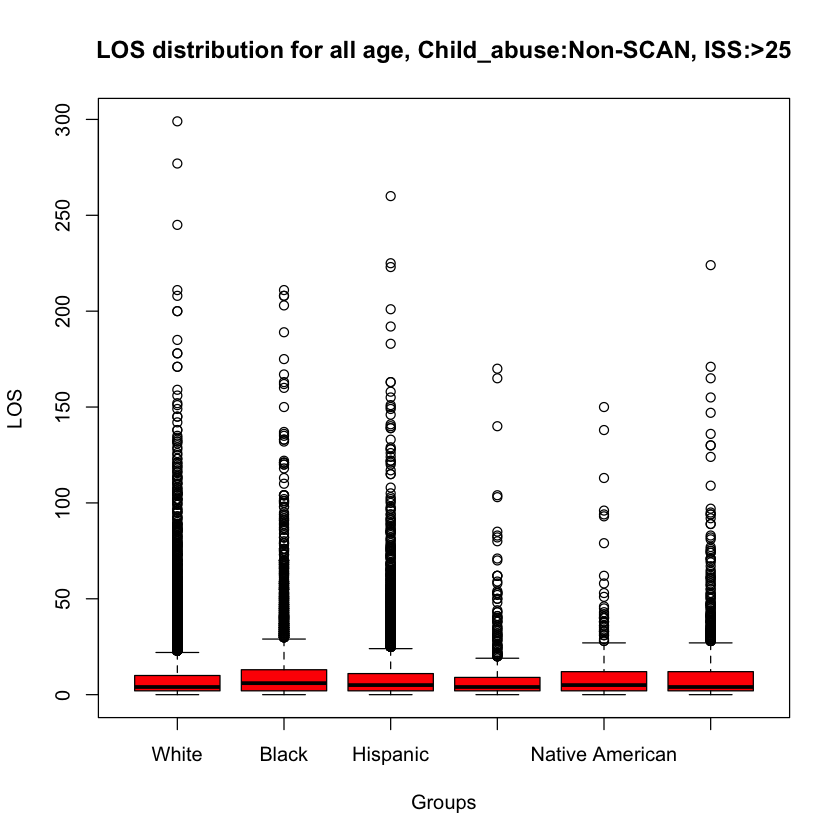

In [188]:
dunnetts_test("Non-SCAN", ">25", dat)

[1] 44078     2
[1] "box-plot:"
               Df  Sum Sq Mean Sq F value   Pr(>F)    
RACE            5    8457  1691.3   16.49 2.68e-16 ***
Residuals   38096 3907043   102.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
5976 observations deleted due to missingness


diff      lwr.ci      upr.ci   
White.Black-White                     1.2377721  0.86038087 1.6151633
White.Hispanic-White                  0.5385164  0.18624959 0.8907832
White.Asian or Pacific Islander-White 0.1794902 -0.66882889 1.0278093
White.Native American-White           1.5095521  0.29440900 2.7246953
White.Other-White                     0.5956277 -0.01991995 1.2111754
                                      pval         pvalc            
White.Black-White                     1.110223e-16 <0.001           
White.Hispanic-White                  4.359562e-04 <0.001           
White.Asian or Pacific Islander-White 9.873637e-01 0.987363686725868
White.Native American-White           7.085875e-03 <0.01            
White.Other-White                     6.268038e-02 <0.1

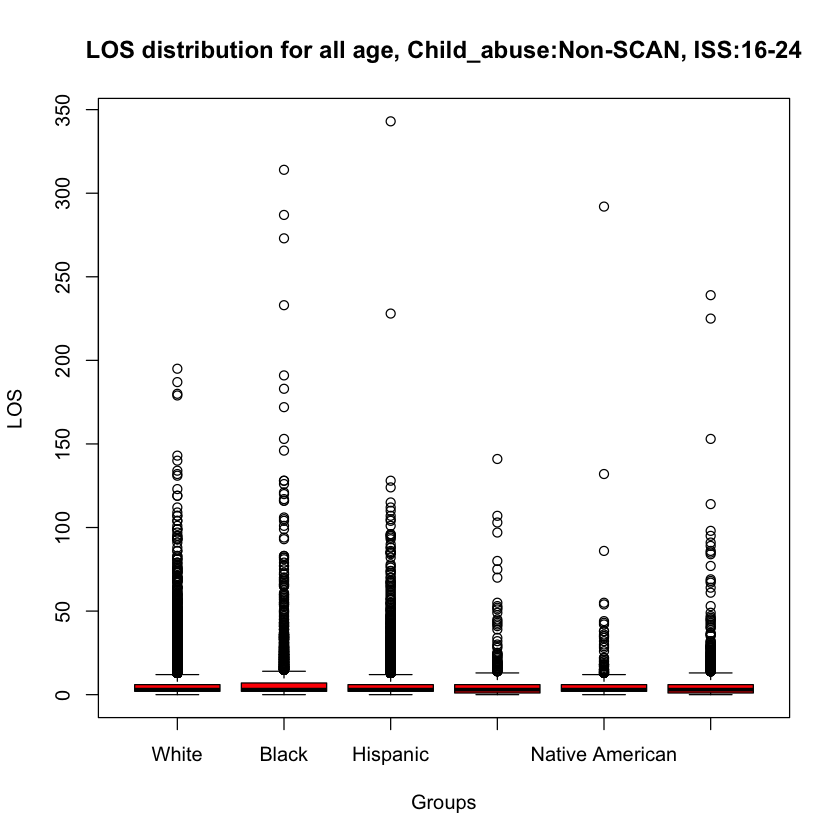

In [189]:
dunnetts_test("Non-SCAN", "16-24", dat)

[1] 374503      2
[1] "box-plot:"
                Df   Sum Sq Mean Sq F value Pr(>F)    
RACE             5    33274    6655   73.62 <2e-16 ***
Residuals   321662 29075412      90                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
52835 observations deleted due to missingness


diff       lwr.ci      upr.ci     
White.Black-White                      0.7809750  0.65764540  0.90430458
White.Hispanic-White                  -0.1460904 -0.25759900 -0.03458178
White.Asian or Pacific Islander-White  0.2490744 -0.02671832  0.52486706
White.Native American-White            0.6970694  0.27541645  1.11872228
White.Other-White                      0.5345651  0.33761711  0.73151312
                                      pval         pvalc 
White.Black-White                     0.000000e+00 <0.001
White.Hispanic-White                  3.840716e-03 <0.01 
White.Asian or Pacific Islander-White 9.694082e-02 <0.1  
White.Native American-White           1.094535e-04 <0.001
White.Other-White                     1.615974e-11 <0.001

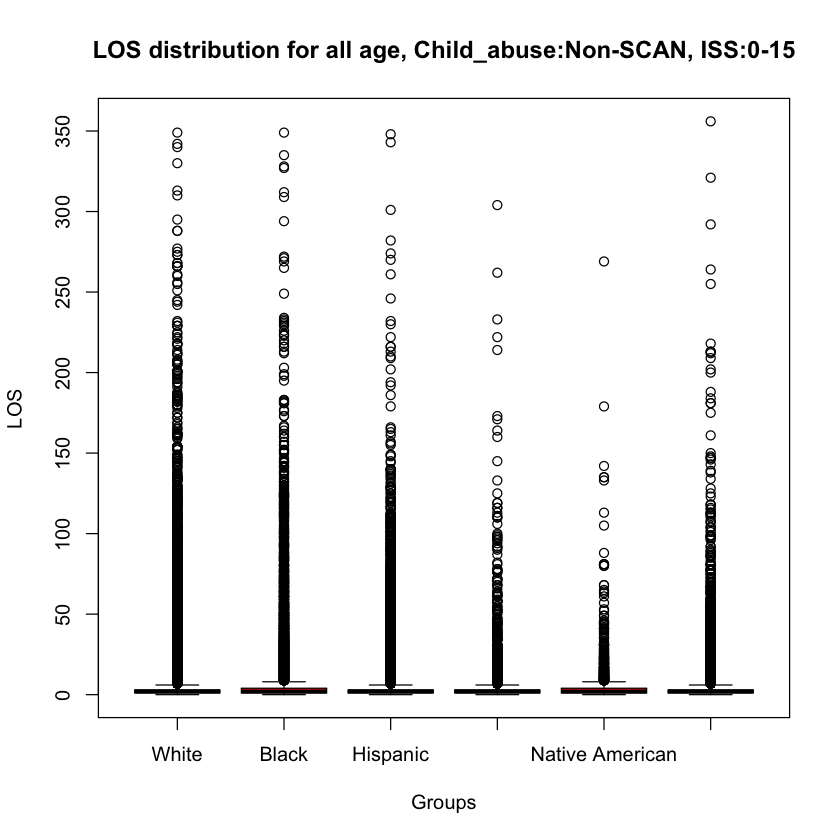

In [190]:
dunnetts_test("Non-SCAN", "0-15", dat)

[1] 2263    2
[1] "box-plot:"
              Df Sum Sq Mean Sq F value Pr(>F)  
RACE           5   2938   587.5   2.701 0.0194 *
Residuals   1951 424458   217.6                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
306 observations deleted due to missingness


diff     lwr.ci     upr.ci    pval       
White.Black-White                     1.530573 -0.6035845  3.664731 0.281690933
White.Hispanic-White                  3.112872  0.8031202  5.422624 0.002750536
White.Asian or Pacific Islander-White 1.823398 -6.9555283 10.602325 0.987994690
White.Native American-White           2.066432 -4.5484200  8.681284 0.931479709
White.Other-White                     2.251609 -1.3590676  5.862285 0.430642668
                                      pvalc            
White.Black-White                     0.281690932577995
White.Hispanic-White                  <0.01            
White.Asian or Pacific Islander-White 0.987994690261616
White.Native American-White           0.931479709106063
White.Other-White                     0.430642667762522

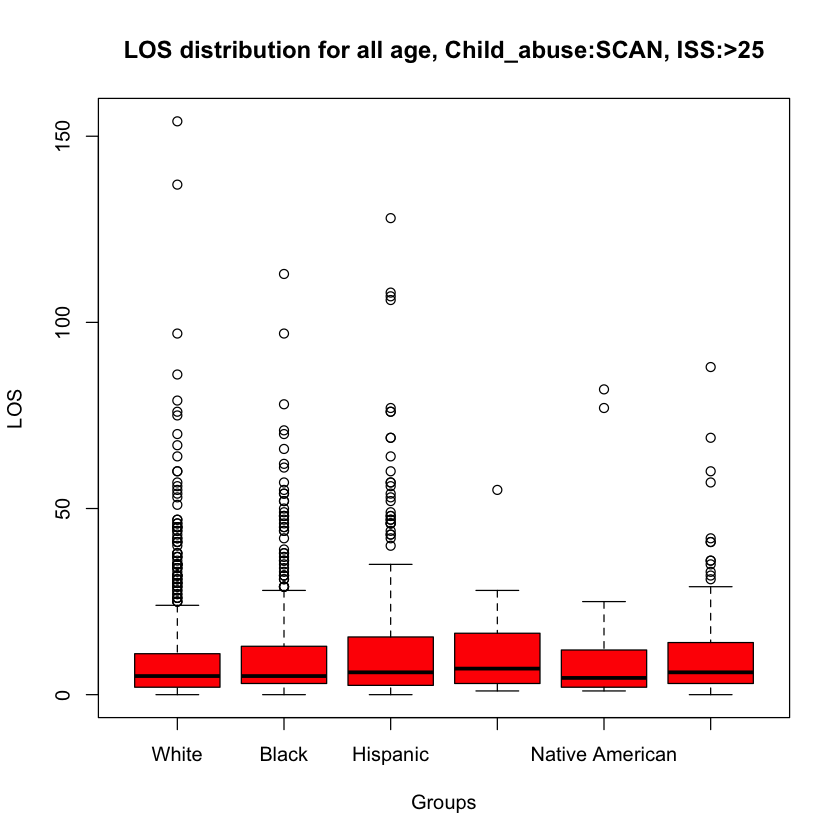

In [191]:
dunnetts_test("SCAN", ">25", dat)

[1] 2358    2
[1] "box-plot:"
              Df Sum Sq Mean Sq F value   Pr(>F)    
RACE           5   3195   639.0   4.212 0.000822 ***
Residuals   1985 301118   151.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
367 observations deleted due to missingness


diff     lwr.ci       upr.ci   
White.Black-White                     2.526176  0.672834703  4.379517
White.Hispanic-White                  1.873867 -0.006034601  3.753768
White.Asian or Pacific Islander-White 2.517170 -3.767504348  8.801845
White.Native American-White           5.488742 -1.183543262 12.161028
White.Other-White                     2.901786 -0.046765402  5.850337
                                      pval        pvalc            
White.Black-White                     0.002359077 <0.01            
White.Hispanic-White                  0.050975817 <0.1             
White.Asian or Pacific Islander-White 0.829514255 0.829514254943069
White.Native American-White           0.159266823 0.159266823440001
White.Other-White                     0.055774275 <0.1

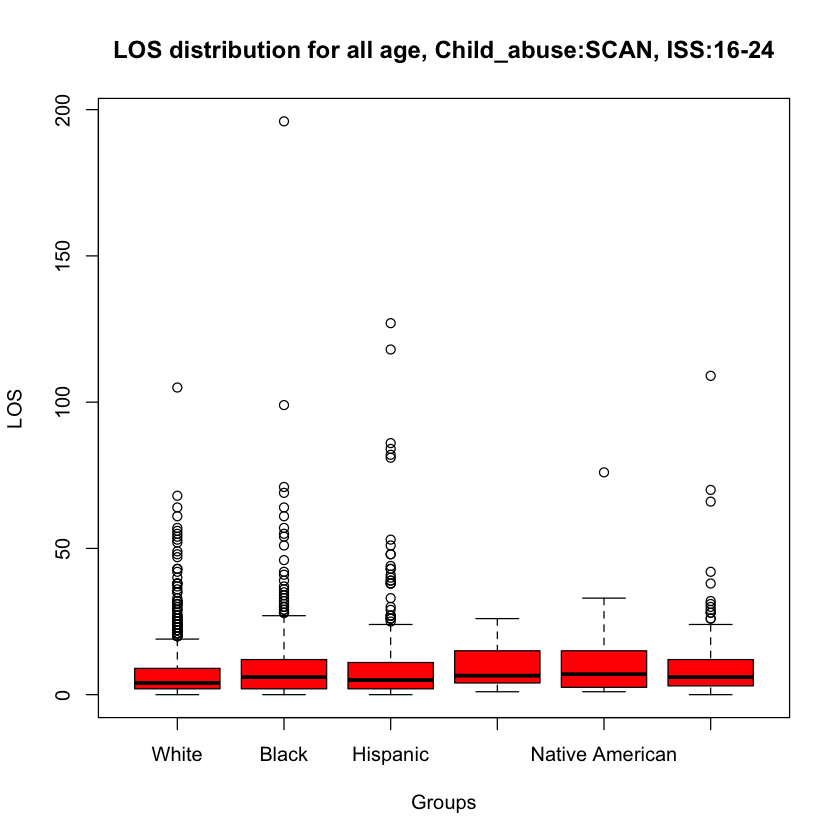

In [192]:
dunnetts_test("SCAN", "16-24", dat)

[1] 5336    2
[1] "box-plot:"
              Df Sum Sq Mean Sq F value Pr(>F)  
RACE           5   1758   351.6   2.709 0.0189 *
Residuals   4661 604983   129.8                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
669 observations deleted due to missingness


diff        lwr.ci      upr.ci  
White.Black-White                      1.25876162  0.20549072 2.312033
White.Hispanic-White                   0.73637940 -0.41064256 1.883401
White.Asian or Pacific Islander-White -0.09434389 -4.19737345 4.008686
White.Native American-White            0.65193402 -3.11396209 4.417830
White.Other-White                      1.91325145 -0.08190632 3.908409
                                      pval       pvalc            
White.Black-White                     0.01074095 <0.05            
White.Hispanic-White                  0.39959464 0.399594636642035
White.Asian or Pacific Islander-White 0.99999975 0.999999746712826
White.Native American-White           0.99483443 0.994834425044155
White.Other-White                     0.06654263 <0.1

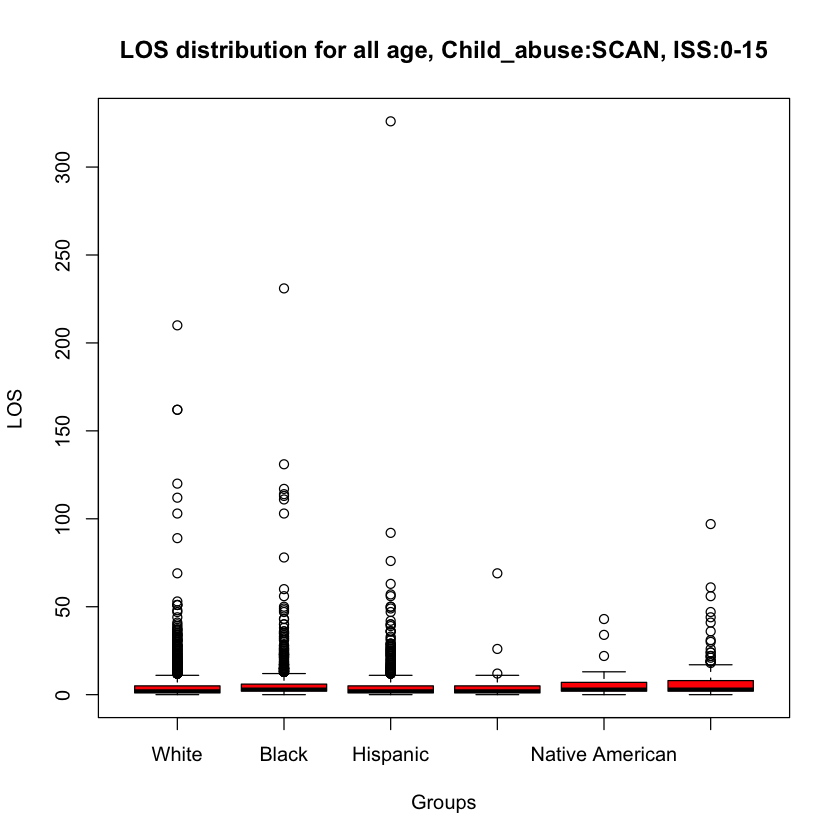

In [193]:
dunnetts_test("SCAN", "0-15", dat)

# Use Dunnetts test, keep race as a variable, control ISS, take LOS as measurement

In [84]:
datns = filter(dat, Child_abuse == 'Non-SCAN')[c("RACE","LOS")]
dats = filter(dat, Child_abuse == 'SCAN')[c("RACE","LOS")]
dim(datns)
dim(dats)

[1] 278726      2

[1] 5354    2

## 1. Visualize the values for each group.

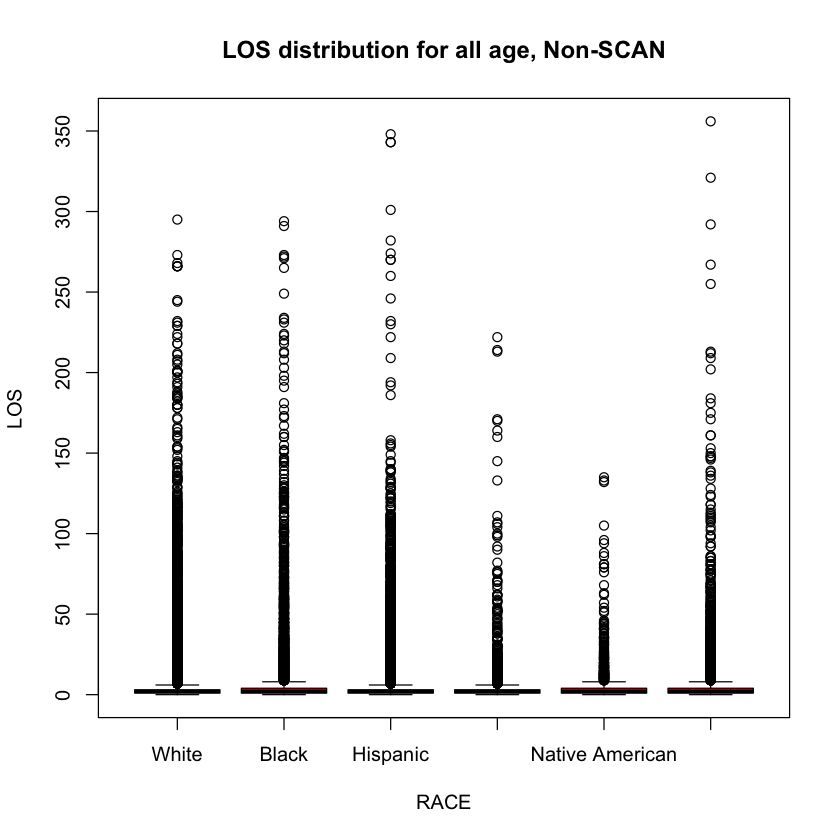

In [85]:
boxplot(LOS ~ RACE,
        data = datns,
        main = "LOS distribution for all age, Non-SCAN",
        xlab = "RACE",
        ylab = "LOS",
        col = "red",
        border = "black")

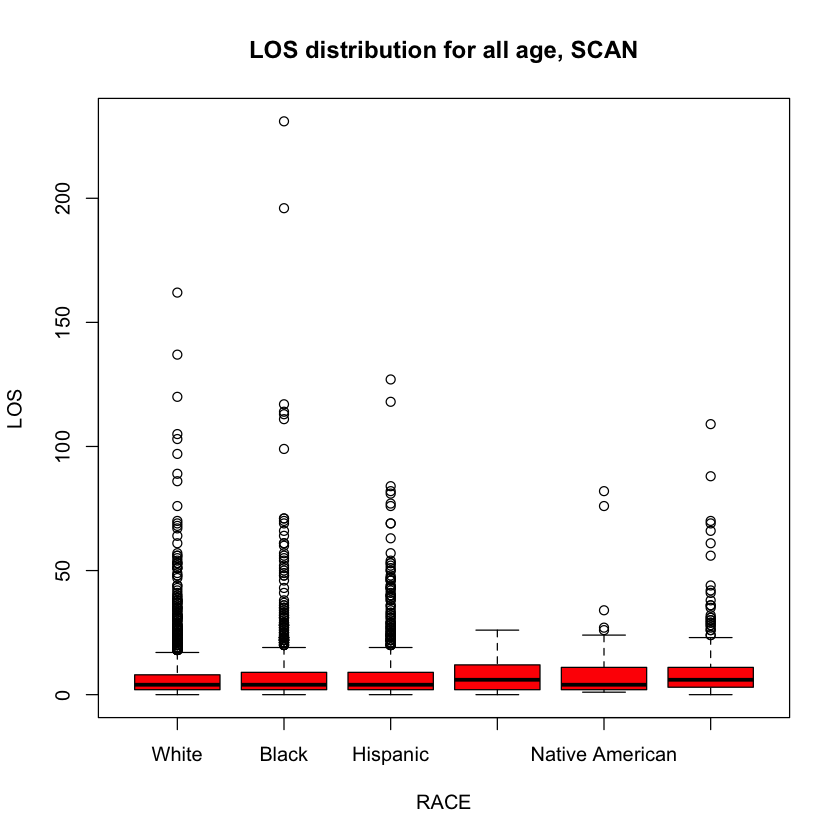

In [86]:
boxplot(LOS ~ RACE,
        data = dats,
        main = "LOS distribution for all age, SCAN",
        xlab = "RACE",
        ylab = "LOS",
        col = "red",
        border = "black")

## 2. ANOVA(Analysis of variance) Comparison

The analysis of variance technique helps us to identify whether there exists a significant mean difference in more than two variables or not. To detect this difference, we either use F-statistic value or p-value. If the F-statistic value is greater than the critical value of F or if p-value is less than the level of significance then we say that at least one of the means is significantly different from the rest. <br>
We can calculate F and p values using the aov function. Let’s put the model together.

In [87]:
model <- aov(LOS ~ RACE, data = datns)
summary(model)

                Df   Sum Sq Mean Sq F value Pr(>F)    
RACE             5    24469    4894    58.1 <2e-16 ***
Residuals   228077 19222870      84                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
50643 observations deleted due to missingness

In [88]:
model <- aov(LOS ~ RACE, data = dats)
summary(model)

              Df Sum Sq Mean Sq F value  Pr(>F)    
RACE           5   3568     714    4.37 0.00057 ***
Residuals   4431 724008     163                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
917 observations deleted due to missingness

Based on the ANOVA model the p-value is statistically significant (p<0.001), indicate that each group does not have the same average values.

Let’s perform Dunnett’s test and identify which groups are statistically significant.

## 3. Dunnett’s Test.

We can make use of DunnettTest() function from the DescTools package.

Dunnett’s Function syntax is as follows, where:

DunnettTest(x, g)

x: Numerical values

g: Group Names

Let’s load the library and perform Dunnett’s test

In [89]:
# install.packages("DescTools")

In [90]:
library(DescTools)

In [100]:
dtest1 = DunnettTest(x=datns$LOS, g=datns$RACE)

[1] "list"

In [101]:
dtest1


  Dunnett's test for comparing several treatments with a control :  
    95% family-wise confidence level

$White
                                   diff    lwr.ci  upr.ci    pval    
Black-White                     0.84791  0.704817 0.99100 < 2e-16 ***
Hispanic-White                  0.14357  0.015211 0.27193  0.0201 *  
Asian or Pacific Islander-White 0.22943 -0.106859 0.56573  0.3359    
Native American-White           0.84653  0.366907 1.32616 2.9e-05 ***
Other-White                     0.76367  0.536307 0.99104 < 2e-16 ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [102]:
dtable1 = do.call(rbind.data.frame, dtest1)

In [103]:
dtable1

diff    lwr.ci    upr.ci  pval      
White.Black-White                     0.84791  0.704817 0.99100 0.0000e+00
White.Hispanic-White                  0.14357  0.015211 0.27193 2.0147e-02
White.Asian or Pacific Islander-White 0.22943 -0.106859 0.56573 3.3593e-01
White.Native American-White           0.84653  0.366907 1.32616 2.9174e-05
White.Other-White                     0.76367  0.536307 0.99104 0.0000e+00

In [104]:

# dtable1[dtable1$pval < 0.001, ]$pval <- '<0.001'
# dtable1[dtable1$pval < 0.05, ]$pval <- '<0.05'
# dtable1[dtable1$pval < 0.01, ]$pval <- '<0.01'

In [105]:
dtable1

diff    lwr.ci    upr.ci  pval      
White.Black-White                     0.84791  0.704817 0.99100 0.0000e+00
White.Hispanic-White                  0.14357  0.015211 0.27193 2.0147e-02
White.Asian or Pacific Islander-White 0.22943 -0.106859 0.56573 3.3593e-01
White.Native American-White           0.84653  0.366907 1.32616 2.9174e-05
White.Other-White                     0.76367  0.536307 0.99104 0.0000e+00
                                      pvalc 
White.Black-White                     <0.001
White.Hispanic-White                  <0.05 
White.Asian or Pacific Islander-White NA    
White.Native American-White           <0.001
White.Other-White                     <0.001

In [99]:
DunnettTest(x=dats$LOS, g=dats$RACE)


  Dunnett's test for comparing several treatments with a control :  
    95% family-wise confidence level

$White
                                   diff    lwr.ci upr.ci   pval    
Black-White                     1.55710  0.315015 2.7992 0.0065 ** 
Hispanic-White                  1.33552  0.024836 2.6462 0.0434 *  
Asian or Pacific Islander-White 0.71782 -4.023679 5.4593 0.9972    
Native American-White           3.11864 -1.576294 7.8136 0.3624    
Other-White                     2.74836  0.699787 4.7969 0.0029 ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


(Given Non-SCAN)<br>
The LOS of Black group significantly 0.8479 higher compared to White (p<0.001).<br>
The LOS of Hispanic group also significantly 0.1436 higher compared to White (p<0.05). <br>
The LOS of Native American-White group also significantly 0.8465 higher compared to White (p<0.001). <br>

(Given SCAN)<br>
The LOS of Black group significantly 1.5571 higher compared to White (p<0.01).<br>
The LOS of Hispanic group also significantly 1.3355 higher compared to White (p<0.05). <br>

(Calculate increase for SCAN compared with Non-SCAN) <br>
The increase of LOS for SCAN compared with Non-SCAN for Black group: 1.5571 - 0.8479 = 0.7092 <br>
The increase of LOS for SCAN compared with Non-SCAN for Hispanic group: 1.3355 - 0.1436 = 1.1919 <br>

In [34]:
# age all child_abuse = SCAN
dat6 = filter(dat, Child_abuse == 'SCAN')
dim(dat6)
res6 = dat6 %>% group_by(RACE, SEVGROUP) %>% summarise(Mean_LOS = mean(LOS, na.rm = TRUE))
tab6 <- xtabs(Mean_LOS ~ RACE+SEVGROUP, data=res6)
print("age all child_abuse = SCAN")
tab6

[1] 5354   34

`summarise()` has grouped output by 'RACE'. You can override using the `.groups` argument.



[1] "age all child_abuse = SCAN"


                           SEVGROUP
RACE                              >25     16-24      0-15
  White                     10.867647  8.814327  5.402778
  Black                     11.481481 12.014652  6.732484
  Hispanic                  16.000000 10.915751  5.646825
  Asian or Pacific Islander  7.714286 12.157895  4.565217
  Native American           16.400000 13.529412  5.391304
  Other                     13.509804 11.895238  7.222222

In [35]:
# dat6c = filter(dat6, RACE=='Asian or Pacific Islander')
# dim(dat6c)
# dat6c[, c('DISCWT', 'RACE', 'LOS')]

[1] 49 34

DISCWT   RACE                      LOS
1  1.843069 Asian or Pacific Islander 22 
2  1.393260 Asian or Pacific Islander 12 
3  1.393260 Asian or Pacific Islander 12 
4  1.410774 Asian or Pacific Islander  3 
5  1.803242 Asian or Pacific Islander  6 
6  1.443080 Asian or Pacific Islander 13 
7  1.435720 Asian or Pacific Islander 26 
8  1.435720 Asian or Pacific Islander  9 
9  1.843069 Asian or Pacific Islander  5 
10 1.393260 Asian or Pacific Islander  3 
11 1.453931 Asian or Pacific Islander  7 
12 1.803242 Asian or Pacific Islander 19 
13 1.614416 Asian or Pacific Islander  1 
14 1.614416 Asian or Pacific Islander  7 
15 1.614416 Asian or Pacific Islander  1 
16 1.292747 Asian or Pacific Islander 16 
17 1.614416 Asian or Pacific Islander  4 
18 1.366650 Asian or Pacific Islander  2 
19 1.292747 Asian or Pacific Islander  8 
20 1.366650 Asian or Pacific Islander  8 
21 1.614416 Asian or Pacific Islander 16 
22 1.366650 Asian or Pacific Islander  2 
23 1.614416 Asian or Pacific Islander 15 
24 1.448493 Asian or Pacific Islander  2 
25 1.614416 Asian or Pacific Islander  7 
26 1.292747 Asian or Pacific Islander  1 
27 1.614416 Asian or Pacific Islander 26 
28 1.341116 Asian or Pacific Islander  1 
29 1.614416 Asian or Pacific Islander  9 
30 1.322682 Asian or Pacific Islander  5 
31 1.322682 Asian or Pacific Islander 12 
32 1.322682 Asian or Pacific Islander 24 
33 1.476196 Asian or Pacific Islander  6 
34 1.241312 Asian or Pacific Islander  5 
35 1.310778 Asian or Pacific Islander  1 
36 1.419271 Asian or Pacific Islander  6 
37 1.419271 Asian or Pacific Islander  0 
38 1.419271 Asian or Pacific Islander  2 
39 1.419271 Asian or Pacific Islander  0 
40 1.419271 Asian or Pacific Islander  6 
41 1.375722 Asian or Pacific Islander  2 
42 1.332268 Asian or Pacific Islander  1 
43 1.476196 Asian or Pacific Islander  4 
44 1.276894 Asian or Pacific Islander 12 
45 1.476196 Asian or Pacific Islander 26 
46 1.307701 Asian or Pacific Islander  1 
47 1.476196 Asian or Pacific Islander 11 
48 1.332268 Asian or Pacific Islander  2 
49 1.332268 Asian or Pacific Islander  1

# Regression Analysis

In [44]:
# Create regressions: Linear if outcome is continuous, Logistic if outcome is categorical
abuse_race = svyglm(Child_abuse_indicator ~ RACE, family = "binomial", design = dat.w, na.action = na.omit)
summary(abuse_race)
# exp(cbind(OR = coef(abuse_race), confint(abuse_race)))
abuse_race_tb = data.frame(exp(cbind(OR = coef(abuse_race), confint(abuse_race))), P_value = summary(abuse_race)$coefficients[,4])
abuse_race_tb[abuse_race_tb$P_value < 0.01, ]$P_value <- '<0.01'
abuse_race_tb

# abuse_socio = svyglm(Child_abuse_indicator ~ RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL+ HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + HOSP_CONTROL + NACHTYPE, family = "binomial", design = dat.w, na.action = na.omit)
# summary(abuse_socio)
# exp(cbind(OR = coef(abuse_socio), confint(abuse_socio)))


# deleted hospital control
# abuse_socio_new = svyglm(Child_abuse_indicator ~ RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL+ HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + NACHTYPE, family = "binomial", design = dat.w, na.action = na.omit)
abuse_socio_new = svyglm(Child_abuse_indicator ~ RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL+ HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + SEVGROUP, family = "binomial", design = dat.w, na.action = na.omit)
summary(abuse_socio_new)
# exp(cbind(OR = coef(abuse_socio_new), confint(abuse_socio_new)))
abuse_socio_new_tb = data.frame(exp(cbind(OR = coef(abuse_socio_new), confint(abuse_socio_new))), P_value = summary(abuse_socio_new)$coefficients[,4])
abuse_socio_new_tb[abuse_socio_new_tb$P_value < 0.01, ]$P_value <- '<0.01'
abuse_socio_new_tb

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
svyglm(formula = Child_abuse_indicator ~ RACE, design = dat.w, 
    family = "binomial", na.action = na.omit)

Survey design:
svydesign(ids = ~1, data = dat, weights = dat$DISCWT)

Coefficients:
                              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                   -3.95392    0.01580 -250.287  < 2e-16 ***
RACEBlack                      0.55124    0.02743   20.095  < 2e-16 ***
RACEHispanic                   0.11791    0.02930    4.024 5.71e-05 ***
RACEAsian or Pacific Islander -0.68943    0.10362   -6.653 2.87e-11 ***
RACENative American            0.38018    0.09475    4.013 6.01e-05 ***
RACEOther                      0.23335    0.04847    4.814 1.48e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 0.9970845)

Number of Fisher Scoring iterations: 7


OR         X2.5..     X97.5..    P_value
(Intercept)                   0.01917936 0.01859461 0.01978249 <0.01  
RACEBlack                     1.73540965 1.64456693 1.83127035 <0.01  
RACEHispanic                  1.12513744 1.06235022 1.19163553 <0.01  
RACEAsian or Pacific Islander 0.50186367 0.40962321 0.61487517 <0.01  
RACENative American           1.46255477 1.21468335 1.76100747 <0.01  
RACEOther                     1.26282905 1.14837419 1.38869127 <0.01

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
svyglm(formula = Child_abuse_indicator ~ RACE + SEX + AGEGROUP + 
    PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + 
    SEVGROUP, design = dat.w, family = "binomial", na.action = na.omit)

Survey design:
svydesign(ids = ~1, data = dat, weights = dat$DISCWT)

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -5.280788   0.121277 -43.543  < 2e-16 ***
RACEBlack                       0.093999   0.032459   2.896  0.00378 ** 
RACEHispanic                   -0.341203   0.034199  -9.977  < 2e-16 ***
RACEAsian or Pacific Islander  -0.930240   0.108935  -8.539  < 2e-16 ***
RACENative American            -0.004319   0.115187  -0.037  0.97009    
RACEOther                      -0.182572   0.052452  -3.481  0.00050 ***
SEXFemale                       0.116255   0.024542   4.737 2.17e-06 ***
AGEGROUP8-11                    0.152292   0.091689   1.661  0.09672 .  
AGEGROUP4-7                     0.869812 

OR           X2.5..       X97.5..     
(Intercept)                     0.005088417  0.004011909  0.006453783
RACEBlack                       1.098558711  1.030847235  1.170717833
RACEHispanic                    0.710914786  0.664825167  0.760199611
RACEAsian or Pacific Islander   0.394459165  0.318622463  0.488346087
RACENative American             0.995690174  0.794468945  1.247876243
RACEOther                       0.833124857  0.751731377  0.923331191
SEXFemale                       1.123282281  1.070528542  1.178635631
AGEGROUP8-11                    1.164499876  0.972955908  1.393752740
AGEGROUP4-7                     2.386462369  2.090397834  2.724458735
AGEGROUP1-3                    12.288632694 11.120574368 13.579378949
AGEGROUP<1                     41.316983115 37.604278330 45.396246638
PAYERPrivate                    0.331565290  0.309616176  0.355070407
PAYERSelf-pay                   0.549602998  0.475666515  0.635031995
PAYEROther                      0.835092606  0.750376291  0.929373261
ZIPINC_QRTL3                    1.262796005  1.159835319  1.374896699
ZIPINC_QRTL2                    1.264766253  1.162499855  1.376029140
ZIPINC_QRTL1                    1.245093566  1.144974188  1.353967631
HOSP_LOCTEACHUrban nonteaching  0.954708465  0.777820269  1.171823735
HOSP_LOCTEACHUrban teaching     1.890522162  1.572784945  2.272449299
HOSP_BEDSIZEMedium              0.883811000  0.812062694  0.961898495
HOSP_BEDSIZELarge               0.836899820  0.778330390  0.899876606
HOSP_REGIONMidwest              1.263547572  1.170158344  1.364390105
HOSP_REGIONSouth                0.951952259  0.886583562  1.022140656
HOSP_REGIONWest                 1.033350211  0.955437772  1.117616122
SEVGROUP16-24                   1.019424940  0.948462561  1.095696604
SEVGROUP0-15                    0.362405022  0.341182299  0.384947873
                               P_value           
(Intercept)                    <0.01             
RACEBlack                      <0.01             
RACEHispanic                   <0.01             
RACEAsian or Pacific Islander  <0.01             
RACENative American            0.970088825297606 
RACEOther                      <0.01             
SEXFemale                      <0.01             
AGEGROUP8-11                   0.0967233756605361
AGEGROUP4-7                    <0.01             
AGEGROUP1-3                    <0.01             
AGEGROUP<1                     <0.01             
PAYERPrivate                   <0.01             
PAYERSelf-pay                  <0.01             
PAYEROther                     <0.01             
ZIPINC_QRTL3                   <0.01             
ZIPINC_QRTL2                   <0.01             
ZIPINC_QRTL1                   <0.01             
HOSP_LOCTEACHUrban nonteaching 0.657526701590975 
HOSP_LOCTEACHUrban teaching    <0.01             
HOSP_BEDSIZEMedium             <0.01             
HOSP_BEDSIZELarge              <0.01             
HOSP_REGIONMidwest             <0.01             
HOSP_REGIONSouth               0.174900868257875 
HOSP_REGIONWest                0.412087101835381 
SEVGROUP16-24                  0.601245261818644 
SEVGROUP0-15                   <0.01

In [ ]:
# deleted hospital control
# los_all = svyglm(LOS ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + NACHTYPE, design = dat.w, na.action = na.omit)
los_all = svyglm(LOS ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION, design = dat.w, na.action = na.omit, family  = Gamma(link = "log"))
summary(los_all)
# exp(cbind(OR = coef(los_all), confint(los_all)))
los_all_tb = data.frame(exp(cbind(OR = coef(los_all), confint(los_all))), P_value = summary(los_all)$coefficients[,4])
los_all_tb[los_all_tb$P_value < 0.01, ]$P_value <- '<0.01'
los_all_tb

# los_scan = svyglm(LOS ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + NACHTYPE, design = subset(dat.w, Child_abuse == 'SCAN'), na.action = na.omit)
los_scan = svyglm(LOS ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION, design = subset(dat.w, Child_abuse == 'SCAN'), na.action = na.omit, family  = Gamma(link = "log"))
summary(los_scan)
# exp(cbind(OR = coef(los_scan), confint(los_scan)))
los_scan_tb = data.frame(exp(cbind(OR = coef(los_scan), confint(los_scan))), P_value = summary(los_scan)$coefficients[,4])
los_scan_tb[los_scan_tb$P_value < 0.01, ]$P_value <- '<0.01'
los_scan_tb

# non scan
# los_non_scan = svyglm(LOS ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + NACHTYPE, design = subset(dat.w, Child_abuse == 'Non-SCAN'), na.action = na.omit)
los_non_scan = svyglm(LOS ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION, design = subset(dat.w, Child_abuse == 'Non-SCAN'), na.action = na.omit, family  = Gamma(link = "log"))
summary(los_non_scan)
los_non_scan_tb = data.frame(exp(cbind(OR = coef(los_non_scan), confint(los_non_scan))), P_value = summary(los_non_scan)$coefficients[,4])
los_non_scan_tb[los_non_scan_tb$P_value < 0.01, ]$P_value <- '<0.01'
los_non_scan_tb

In [ ]:
# deleted hospital control
# mortality_all = svyglm(DIED ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + NACHTYPE, family = "binomial", design = dat.w, na.action = na.omit)
mortality_all = svyglm(DIED ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION, family = "binomial", design = dat.w, na.action = na.omit)
summary(mortality_all)
# exp(cbind(OR = coef(mortality_all), confint(mortality_all)))
mortality_all_tb = data.frame(exp(cbind(OR = coef(mortality_all), confint(mortality_all))), P_value = summary(mortality_all)$coefficients[,4])
mortality_all_tb[mortality_all_tb$P_value < 0.01, ]$P_value <- '<0.01'
mortality_all_tb


# mortality_scan = svyglm(DIED ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + NACHTYPE, family = "binomial", design = subset(dat.w, Child_abuse == 'SCAN'), na.action = na.omit)
mortality_scan = svyglm(DIED ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION, family = "binomial", design = subset(dat.w, Child_abuse == 'SCAN'), na.action = na.omit)
summary(mortality_scan)
# exp(cbind(OR = coef(mortality_scan), confint(mortality_scan)))
mortality_scan_tb = data.frame(exp(cbind(OR = coef(mortality_scan), confint(mortality_scan))), P_value = summary(mortality_scan)$coefficients[,4])
mortality_scan_tb[mortality_scan_tb$P_value < 0.01, ]$P_value <- '<0.01'
mortality_scan_tb

# non scan
# mortality_non_scan = svyglm(DIED ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + NACHTYPE, family = "binomial", design = subset(dat.w, Child_abuse == 'Non-SCAN'), na.action = na.omit)
mortality_non_scan = svyglm(DIED ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION, family = "binomial", design = subset(dat.w, Child_abuse == 'Non-SCAN'), na.action = na.omit)
summary(mortality_non_scan)
# exp(cbind(OR = coef(mortality_non_scan), confint(mortality_non_scan)))
mortality_non_scan_tb = data.frame(exp(cbind(OR = coef(mortality_non_scan), confint(mortality_non_scan))), P_value = summary(mortality_non_scan)$coefficients[,4])
mortality_non_scan_tb[mortality_non_scan_tb$P_value < 0.01, ]$P_value <- '<0.01'
mortality_non_scan_tb


In [165]:
# deleted hospital control
# costpd_all = svyglm(COSTPD ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL+ HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + LOS + DIED + NACHTYPE, design = dat.w, na.action = na.omit)
costpd_all = svyglm(COSTPD ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL+ HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + LOS + DIED, design = dat.w, na.action = na.omit)
summary(costpd_all)
exp(cbind(OR = coef(costpd_all), confint(costpd_all)))

# costpd_scan = svyglm(COSTPD ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL+ HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + LOS + DIED + NACHTYPE, design = subset(dat.w, Child_abuse == 'SCAN'), na.action = na.omit)
costpd_scan = svyglm(COSTPD ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL+ HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + LOS + DIED, design = subset(dat.w, Child_abuse == 'SCAN'), na.action = na.omit)
summary(costpd_scan)
exp(cbind(OR = coef(costpd_scan), confint(costpd_scan)))

# non scan
# costpd_non_scan = svyglm(COSTPD ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL+ HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + LOS + DIED + NACHTYPE, design = subset(dat.w, Child_abuse == 'Non-SCAN'), na.action = na.omit)
costpd_non_scan = svyglm(COSTPD ~ SEVGROUP + RACE  + SEX + AGEGROUP + PAYER + ZIPINC_QRTL+ HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + LOS + DIED, design = subset(dat.w, Child_abuse == 'Non-SCAN'), na.action = na.omit)
summary(costpd_non_scan)
exp(cbind(OR = coef(costpd_non_scan), confint(costpd_non_scan)))





Call:
svyglm(formula = COSTPD ~ SEVGROUP + RACE + SEX + AGEGROUP + 
    PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + 
    LOS + DIED, design = dat.w, na.action = na.omit)

Survey design:
svydesign(ids = ~1, data = dat, weights = dat$DISCWT)

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     6603.989     85.152  77.556  < 2e-16 ***
SEVGROUP16-24                   -585.189     33.974 -17.224  < 2e-16 ***
SEVGROUP0-15                    -966.095     27.819 -34.727  < 2e-16 ***
RACEBlack                        170.126     20.484   8.305  < 2e-16 ***
RACEHispanic                     167.864     20.638   8.134 4.17e-16 ***
RACEAsian or Pacific Islander    129.347     48.451   2.670 0.007594 ** 
RACENative American             -353.962     83.461  -4.241 2.23e-05 ***
RACEOther                        229.080     32.959   6.951 3.65e-12 ***
SEXFemale                       -408.346     14.350 -28.457  < 2

OR            2.5 %         97.5 %       
(Intercept)                              Inf           Inf           Inf
SEVGROUP16-24                  7.172533e-255 8.639154e-284 5.954893e-226
SEVGROUP0-15                    0.000000e+00  0.000000e+00  0.000000e+00
RACEBlack                       7.669797e+73  2.810920e+56  2.092759e+91
RACEHispanic                    7.986014e+72  2.165249e+55  2.945455e+90
RACEAsian or Pacific Islander   1.495714e+56  8.568535e+14  2.610903e+97
RACENative American            1.889312e-154 1.714219e-225  2.082289e-83
RACEOther                       3.078405e+99  2.714290e+71 3.491364e+127
SEXFemale                      4.543622e-178 2.772207e-190 7.446955e-166
AGEGROUP8-11                    9.639247e-86 1.084163e-105  8.570215e-66
AGEGROUP4-7                     2.733727e-80  5.375111e-97  1.390345e-63
AGEGROUP1-3                    3.260981e-319  0.000000e+00 1.277056e-301
AGEGROUP<1                      0.000000e+00  0.000000e+00  0.000000e+00
PAYERPrivate                   8.510279e+107  1.448492e+94 5.000018e+121
PAYERSelf-pay                   1.283076e+57  1.337344e+28  1.231011e+86
PAYEROther                     3.126859e+191 9.510918e+138 1.028003e+244
ZIPINC_QRTL3                   8.546893e-151 1.445246e-169 5.054461e-132
ZIPINC_QRTL2                   9.334979e-214 3.054768e-234 2.852649e-193
ZIPINC_QRTL1                   9.208522e-265 1.414843e-283 5.993376e-246
HOSP_LOCTEACHUrban nonteaching 4.204741e-228 7.775990e-290 2.273646e-166
HOSP_LOCTEACHUrban teaching     2.270889e+87  4.072331e+27 1.266335e+147
HOSP_BEDSIZEMedium              0.000000e+00  0.000000e+00  0.000000e+00
HOSP_BEDSIZELarge               0.000000e+00  0.000000e+00  0.000000e+00
HOSP_REGIONMidwest             2.031866e+148 1.231386e+131 3.352708e+165
HOSP_REGIONSouth                2.654293e+20  2.623303e+06  2.685649e+34
HOSP_REGIONWest                          Inf           Inf           Inf
LOS                             9.196355e-21  1.177448e-21  7.182734e-20
DIEDTRUE                                 Inf           Inf           Inf


Call:
svyglm(formula = COSTPD ~ SEVGROUP + RACE + SEX + AGEGROUP + 
    PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + 
    LOS + DIED, design = subset(dat.w, Child_abuse == "SCAN"), 
    na.action = na.omit)

Survey design:
subset(dat.w, Child_abuse == "SCAN")

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     3980.106    346.876  11.474  < 2e-16 ***
SEVGROUP16-24                   -513.788    118.258  -4.345 1.41e-05 ***
SEVGROUP0-15                    -983.737    109.548  -8.980  < 2e-16 ***
RACEBlack                         68.528     90.824   0.755 0.450562    
RACEHispanic                     235.973    106.954   2.206 0.027391 *  
RACEAsian or Pacific Islander    -37.916    309.859  -0.122 0.902614    
RACENative American             -213.867    494.180  -0.433 0.665193    
RACEOther                        -30.531    170.867  -0.179 0.858191    
SEXFemale                         16.136     

OR            2.5 %         97.5 %       
(Intercept)                              Inf           Inf           Inf
SEVGROUP16-24                  7.324293e-224  0.000000e+00 3.478651e-123
SEVGROUP0-15                    0.000000e+00  0.000000e+00  0.000000e+00
RACEBlack                       5.771521e+29  2.755521e-48 1.208862e+107
RACEHispanic                   3.031462e+102  2.681950e+11 3.426522e+193
RACEAsian or Pacific Islander   3.415482e-17 5.501417e-281 2.120456e+247
RACENative American             1.314531e-93  0.000000e+00           Inf
RACEOther                       5.502920e-14 1.889227e-159 1.602885e+132
SEXFemale                       1.018186e+07  3.558923e-58  2.912966e+71
AGEGROUP8-11                   1.035389e+110 9.878846e-101           Inf
AGEGROUP4-7                              Inf           Inf           Inf
AGEGROUP1-3                              Inf 1.887134e+265           Inf
AGEGROUP<1                     9.013150e+168  7.651831e+52 1.061666e+285
PAYERPrivate                   3.371391e+149  3.063688e+38 3.709998e+260
PAYERSelf-pay                   1.506488e+64 9.465574e-113 2.397642e+240
PAYEROther                     3.139056e+195  7.382046e-08           Inf
ZIPINC_QRTL3                    2.484320e+18 1.909638e-101 3.231946e+137
ZIPINC_QRTL2                   3.602151e-123 5.865524e-229  2.212163e-17
ZIPINC_QRTL1                    1.637837e-84 4.620668e-185  5.805462e+16
HOSP_LOCTEACHUrban nonteaching  1.917052e-55 4.163349e-296 8.827244e+185
HOSP_LOCTEACHUrban teaching    6.503163e+125  1.161279e-65           Inf
HOSP_BEDSIZEMedium             3.938599e-169 1.639537e-293  9.461552e-45
HOSP_BEDSIZELarge               0.000000e+00  0.000000e+00  0.000000e+00
HOSP_REGIONMidwest             1.754242e+158  7.950369e+75 3.870719e+240
HOSP_REGIONSouth                5.701943e-98 1.925860e-170  1.688189e-25
HOSP_REGIONWest                          Inf           Inf           Inf
LOS                             3.956901e-12  3.815966e-15  4.103041e-09
DIEDTRUE                                 Inf           Inf           Inf


Call:
svyglm(formula = COSTPD ~ SEVGROUP + RACE + SEX + AGEGROUP + 
    PAYER + ZIPINC_QRTL + HOSP_LOCTEACH + HOSP_BEDSIZE + HOSP_REGION + 
    LOS + DIED, design = subset(dat.w, Child_abuse == "Non-SCAN"), 
    na.action = na.omit)

Survey design:
subset(dat.w, Child_abuse == "Non-SCAN")

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     6611.704     86.076  76.813  < 2e-16 ***
SEVGROUP16-24                   -586.716     35.197 -16.670  < 2e-16 ***
SEVGROUP0-15                    -962.109     28.714 -33.506  < 2e-16 ***
RACEBlack                        173.759     20.910   8.310  < 2e-16 ***
RACEHispanic                     163.523     20.974   7.797 6.38e-15 ***
RACEAsian or Pacific Islander    126.245     48.833   2.585 0.009731 ** 
RACENative American             -353.524     84.643  -4.177 2.96e-05 ***
RACEOther                        235.195     33.483   7.024 2.15e-12 ***
SEXFemale                       -411.

OR            2.5 %         97.5 %       
(Intercept)                              Inf           Inf           Inf
SEVGROUP16-24                  1.558352e-255 1.710684e-285 1.419586e-225
SEVGROUP0-15                    0.000000e+00  0.000000e+00  0.000000e+00
RACEBlack                       2.901542e+75  4.612896e+57  1.825089e+93
RACEHispanic                    1.040346e+71  1.459721e+53  7.414564e+88
RACEAsian or Pacific Islander   6.721720e+54  1.823593e+13  2.477610e+96
RACENative American            2.927794e-154 2.619662e-226  3.272170e-82
RACEOther                      1.393325e+102  4.400513e+73 4.411658e+130
SEXFemale                      1.913524e-179 7.534061e-192 4.860029e-167
AGEGROUP8-11                    5.181194e-86 5.187363e-106  5.175032e-66
AGEGROUP4-7                     5.549517e-81  1.018668e-97  3.023274e-64
AGEGROUP1-3                    5.594031e-312  0.000000e+00 3.731618e-294
AGEGROUP<1                      0.000000e+00  0.000000e+00  0.000000e+00
PAYERPrivate                   3.207405e+104  3.786605e+90 2.716799e+118
PAYERSelf-pay                   2.881021e+54  1.661754e+25  4.994892e+83
PAYEROther                     1.952234e+191 5.913007e+137 6.445478e+244
ZIPINC_QRTL3                   6.814578e-153 7.564260e-172 6.139196e-134
ZIPINC_QRTL2                   6.161018e-214 1.042639e-234 3.640583e-193
ZIPINC_QRTL1                   1.571070e-267 1.340354e-286 1.841500e-248
HOSP_LOCTEACHUrban nonteaching 4.289209e-230 2.504870e-292 7.344618e-168
HOSP_LOCTEACHUrban teaching     1.468304e+88  8.090689e+27 2.664690e+148
HOSP_BEDSIZEMedium              0.000000e+00  0.000000e+00  0.000000e+00
HOSP_BEDSIZELarge               0.000000e+00  0.000000e+00  0.000000e+00
HOSP_REGIONMidwest             3.592778e+147 1.074939e+130 1.200818e+165
HOSP_REGIONSouth                7.002218e+22  4.296582e+08  1.141164e+37
HOSP_REGIONWest                          Inf           Inf           Inf
LOS                             5.752903e-21  6.895535e-22  4.799612e-20
DIEDTRUE                                 Inf           Inf           Inf